Done by Nesrine Abdelhak
Group 2 section 1


<ul> <b>Content</b>
  <li>Introduction</li>
  <li>Imports</li>
  <li>Data Preprocessing</li>
  <li>Data Visualization</li>
  <li>Model specification</li>
  <li>Fitting and Diagnostics</li>
  <li>Forecasting</li>
  <li>Discussion</li>
  <li>Future work</li>
</ul>

<h1>Introduction</h1>  

Natural gas is a vital energy source that plays a crucial role in various sectors, including residential, commercial, industrial, and power generation. As such, forecasting natural gas prices is of significant importance for stakeholders in the energy market. Accurate price predictions enable decision-makers to manage risks effectively, balance supply and demand dynamics, and optimize resource utilization.

**Problem Statement:**

The volatility and complexity of natural gas markets pose challenges for stakeholders in making informed decisions.developing reliable forecasting models is essential to anticipate future price movements accurately.

**Why Choosing This Topic:**

The prediction of natural gas prices using machine learning algorithms presents an exciting opportunity to leverage advanced techniques to address real-world challenges. By harnessing the power of data-driven models, we aim to enhance the accuracy of price forecasts, providing valuable insights to stakeholders in the natural gas market.

<h2>Data Description:</h2>

The dataset comprises two columns: **Date** and **Price**. The Date column represents the timestamp of each observation, while the Price column denotes the corresponding natural gas price at that particular date. The dataset spans a specific time period, allowing us to analyze historical price trends and patterns.

The objective of this project is to employ ARIMA (AutoRegressive Integrated Moving Average) family models for natural gas price forecasting. ARIMA models are a class of statistical models widely used for time series analysis and forecasting. By analyzing historical natural gas price data and applying ARIMA techniques, we aim to develop accurate forecasting models to predict future price movements.

<h1>Imports</h1>

In [1]:
install.packages("zoo")
install.packages("MASS")
install.packages("tseries")
install.packages("forecast")
install.packages("stats")
install.packages("TSA")
install.packages("snpar")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘snpar’ is not available for this version of R

A version of this package for your vers

<h2>Data source :</h2> <a href="https://www.kaggle.com/datasets/arbethi/natural-gas-price-forecasting">Natural Gas Price Forecasting</a> from Kaggle

<h1>Data Preprocessing</h1>

In [2]:
data <- read.csv("Natural Gas Price Forecasting.csv")
head(data)

,Date,Price
,<chr>,<dbl>
1,1997-01-07,3.820000
2,1997-01-08,3.800000
3,1997-01-09,3.610000
4,1997-01-10,3.920000
5,1997-01-11,3.946667
6,1997-01-12,3.973333


In [3]:
# Convert the 'Date' column to Date format
data$Date <- as.Date(data$Date)

In [4]:
data

Date,Price
<date>,<dbl>
1997-01-07,3.820000
1997-01-08,3.800000
1997-01-09,3.610000
1997-01-10,3.920000
1997-01-11,3.946667
1997-01-12,3.973333
1997-01-13,4.000000
1997-01-14,4.010000
1997-01-15,4.340000


Checking the shape of dataset ,number of rows and columns

In [5]:
# Number of rows
num_rows <- nrow(data)
# Number of columns<-
num_cols <- ncol(data)
# Print the shape
cat("Number of rows:", num_rows, "\n")
cat("Number of columns:", num_cols, "\n")

Number of rows: 8618 
Number of columns: 2 


In [6]:
#check null values
missing_values <- colSums(is.na(data))

# Print the result
print(missing_values)

 Date Price 
    0     0 


In [7]:
# Fill null values in Price column
data$Price[is.na(data$Price)] <- round(mean(data$Price, na.rm = TRUE))

In [8]:
#After filling missing values
#check null values
missing_values <- colSums(is.na(data))

# Print the result
print(missing_values)

 Date Price 
    0     0 


In [9]:
min(data$Date)

[1] "1997-01-07"

In [10]:
max(data$Date)

[1] "2020-08-11"

In [11]:
#convert to time series
TS_data <- ts(data, frequency = 12)

<h2>Train and test data</h2>

Next we see the total number of years we have in the dataset and split for training and testing for forcatsing later on.

In [12]:
#see the total number of years
years <- unique(format(data$Date, "%Y"))
cat("Total number of years in full dataset:",length(years))
#take 80 % of data for train
train_len <- round(length(years) * 0.8)
train_years <- years[1:train_len-1]
#20% test for forcast
test_years<-years[train_len:length(years)]

Total number of years in full dataset: 24

In [13]:
#data train
data_train<- data[format(data$Date, "%Y") %in% train_years, ]
data_train

,Date,Price
,<date>,<dbl>
1,1997-01-07,3.820000
2,1997-01-08,3.800000
3,1997-01-09,3.610000
4,1997-01-10,3.920000
5,1997-01-11,3.946667
6,1997-01-12,3.973333
7,1997-01-13,4.000000
8,1997-01-14,4.010000
9,1997-01-15,4.340000


In [14]:
#data test
data_test<- data[format(data$Date, "%Y") %in% test_years, ]
data_test

,Date,Price
,<date>,<dbl>
6569,2015-01-01,3.075000
6570,2015-01-02,3.010000
6571,2015-01-03,3.080000
6572,2015-01-04,3.150000
6573,2015-01-05,3.220000
6574,2015-01-06,2.980000
6575,2015-01-07,3.080000
6576,2015-01-08,2.920000
6577,2015-01-09,2.960000


<h1>Data Visualization</h1>

PLot all dataset from 1997-01-07 up to 2020-08-11

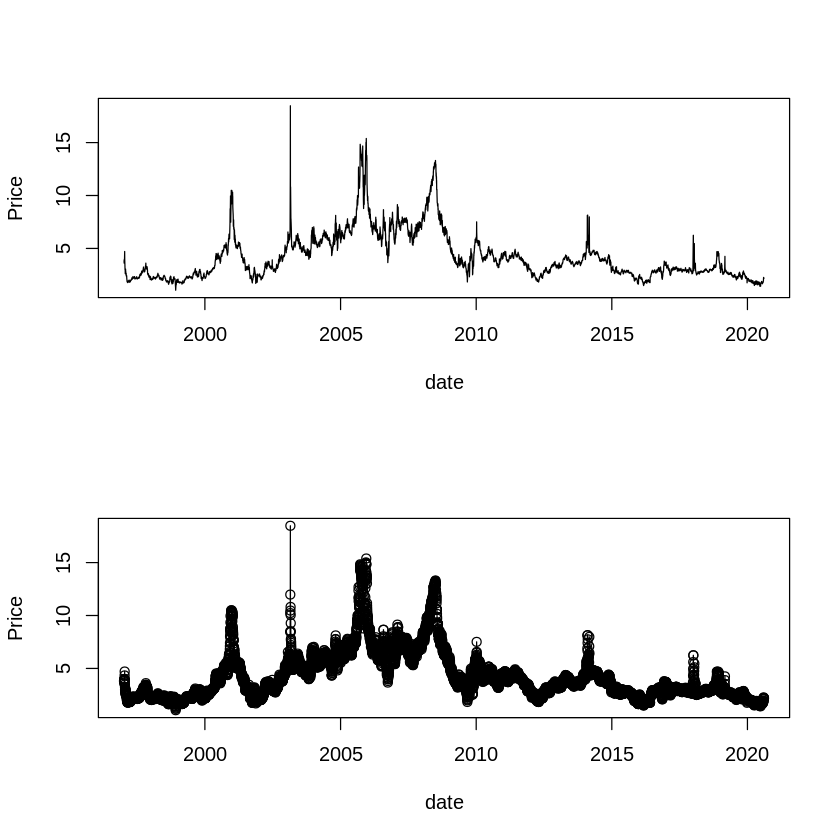

In [ ]:
par(mfrow=c(2, 1))
plot(data$Date, data$Price, type = "l",
     ylab = "Price", xlab = "date")
plot(data$Date, data$Price, type = "o",
     ylab = "Price", xlab = "date")

We notice from the plot of all dataset that the mean and variance are not constant

PLot per year

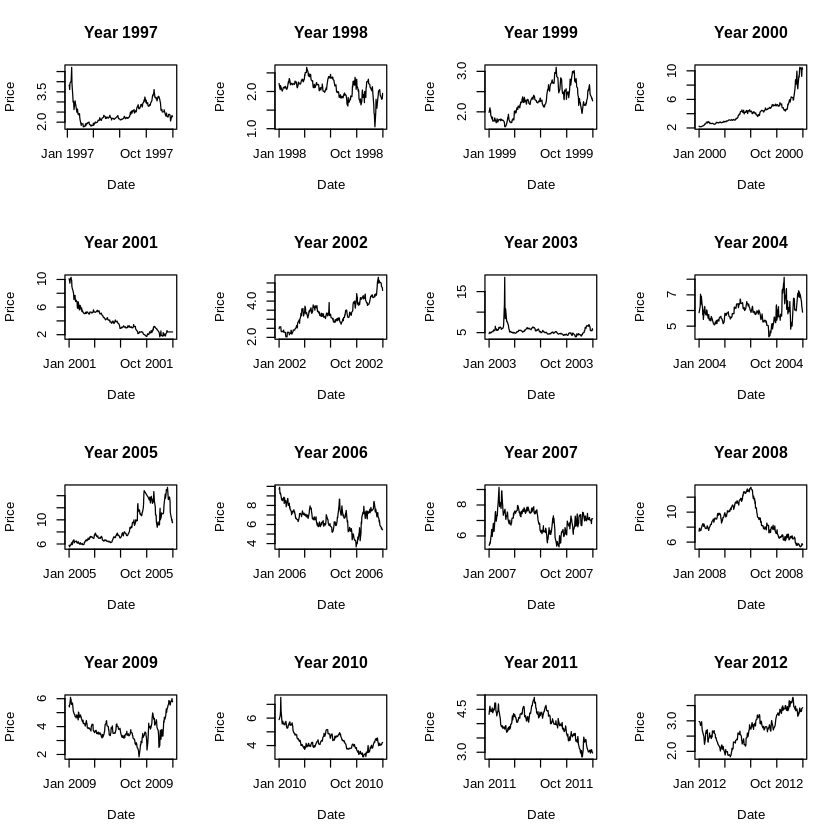

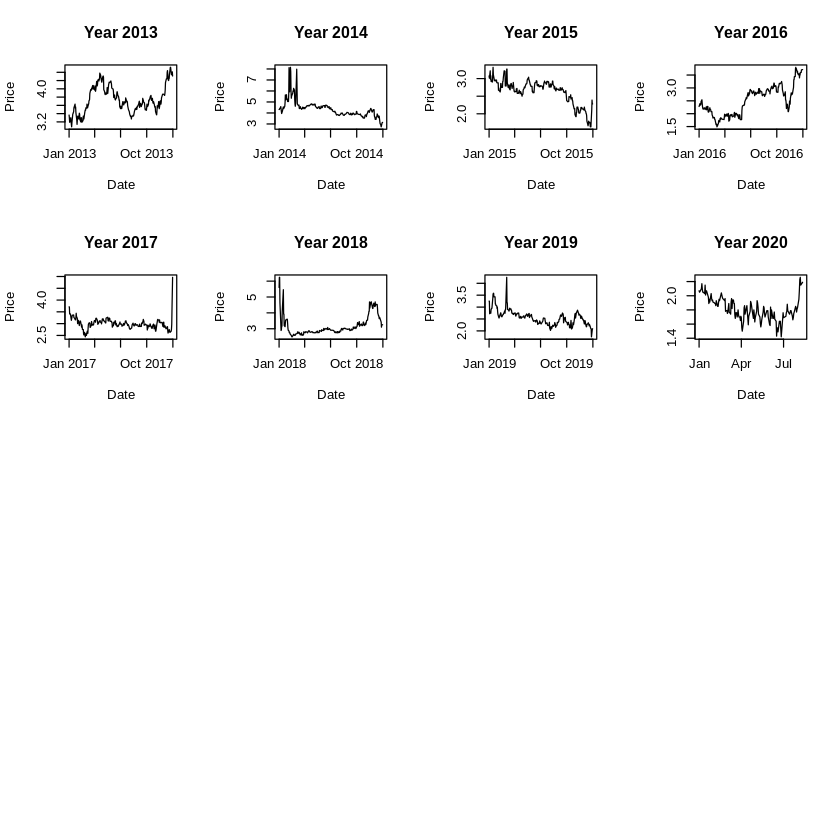

In [ ]:
years <- unique(format(data$Date, "%Y"))

# Plot Price per year
par(mfrow=c(4, 4))
for (year in years) {
  data_year <- data[format(data$Date, "%Y") == year, ]
  avg_temp_year <- aggregate(Price ~ Date, data = data_year, FUN = mean)

  plot(avg_temp_year$Date, avg_temp_year$Price,
       type = "l", ylab = "Price", xlab = "Date",
       main = paste("Year", year))
}

By plotting each year we notice similar patern almost everyyear ,thus we can initialy consider that data is seasonal

In [ ]:
#one year
One_year<-years[23:23]
One_year<- data[format(data$Date, "%Y") %in% One_year, ]
One_year

,Date,Price
,<date>,<dbl>
8030,2019-01-01,3.250000
8031,2019-01-02,3.250000
8032,2019-01-03,2.720000
8033,2019-01-04,2.800000
8034,2019-01-05,2.780000
8035,2019-01-06,2.760000
8036,2019-01-07,2.740000
8037,2019-01-08,2.890000
8038,2019-01-09,2.920000


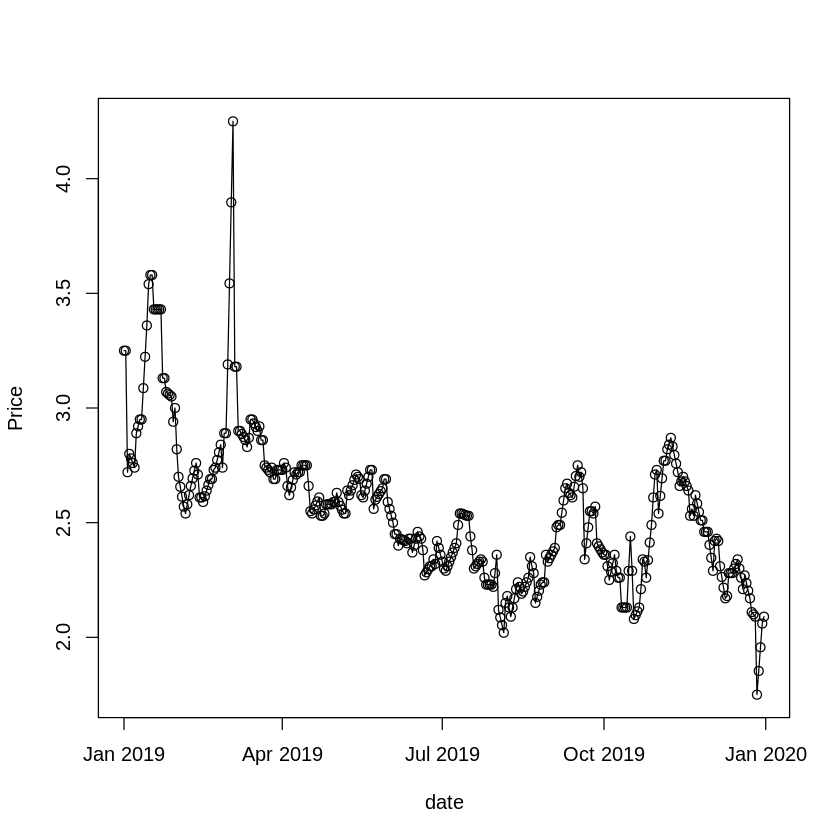

In [ ]:
#plot 1 year
plot(One_year$Date, One_year$Price, type = "o",
     ylab = "Price", xlab = "date")

First 5 years plot

In [ ]:
five_years<-years[0:5]
five_years<- data[format(data$Date, "%Y") %in% five_years, ]
five_years

,Date,Price
,<date>,<dbl>
1,1997-01-07,3.820000
2,1997-01-08,3.800000
3,1997-01-09,3.610000
4,1997-01-10,3.920000
5,1997-01-11,3.946667
6,1997-01-12,3.973333
7,1997-01-13,4.000000
8,1997-01-14,4.010000
9,1997-01-15,4.340000


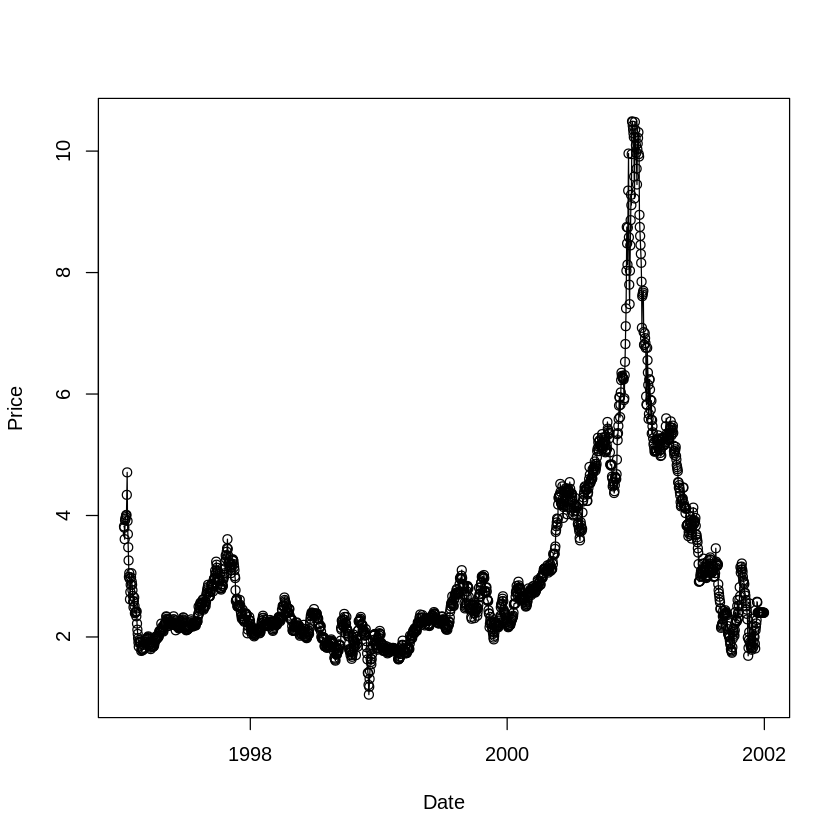

In [ ]:
#plot 5 years
plot(five_years$Date, five_years$Price, type = "o",
     ylab = "Price", xlab = "Date")

Last 10 years plot

In [ ]:
ten_years<-years[14:24]
ten_years<- data[format(data$Date, "%Y") %in% ten_years, ]
ten_years

,Date,Price
,<date>,<dbl>
4743,2010-01-01,5.887500
4744,2010-01-02,5.955000
4745,2010-01-03,6.022500
4746,2010-01-04,6.090000
4747,2010-01-05,6.190000
4748,2010-01-06,6.470000
4749,2010-01-07,7.510000
4750,2010-01-08,6.560000
4751,2010-01-09,6.296667


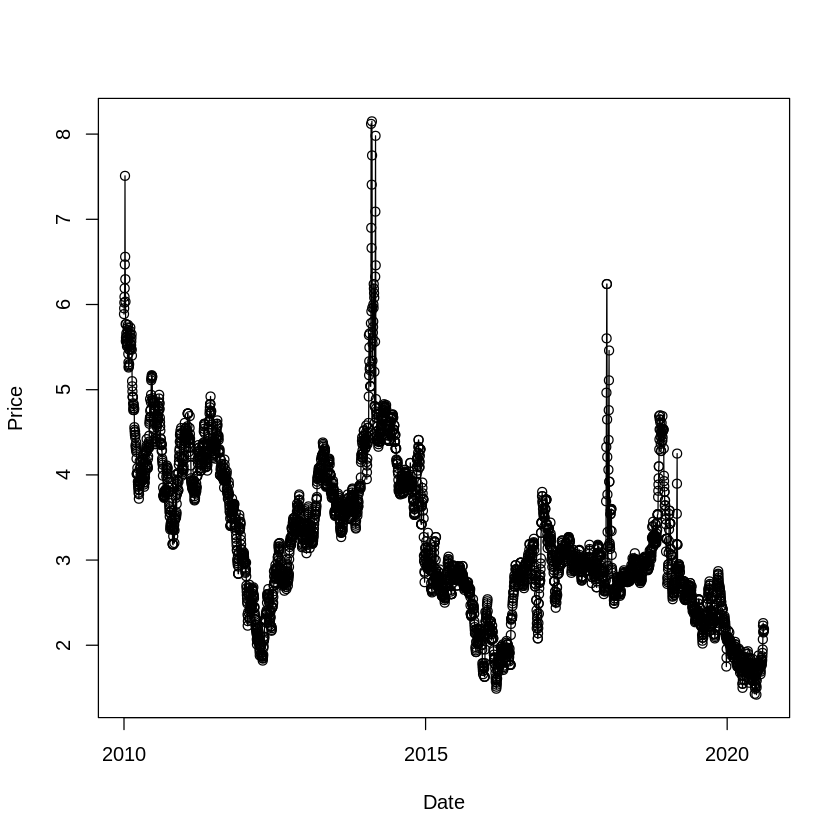

In [ ]:
#plot 10 year
plot(ten_years$Date, ten_years$Price, type = "o",
     ylab = "Price", xlab = "Date")

By plotting 5,10 years ,we can notice the seasonality in data

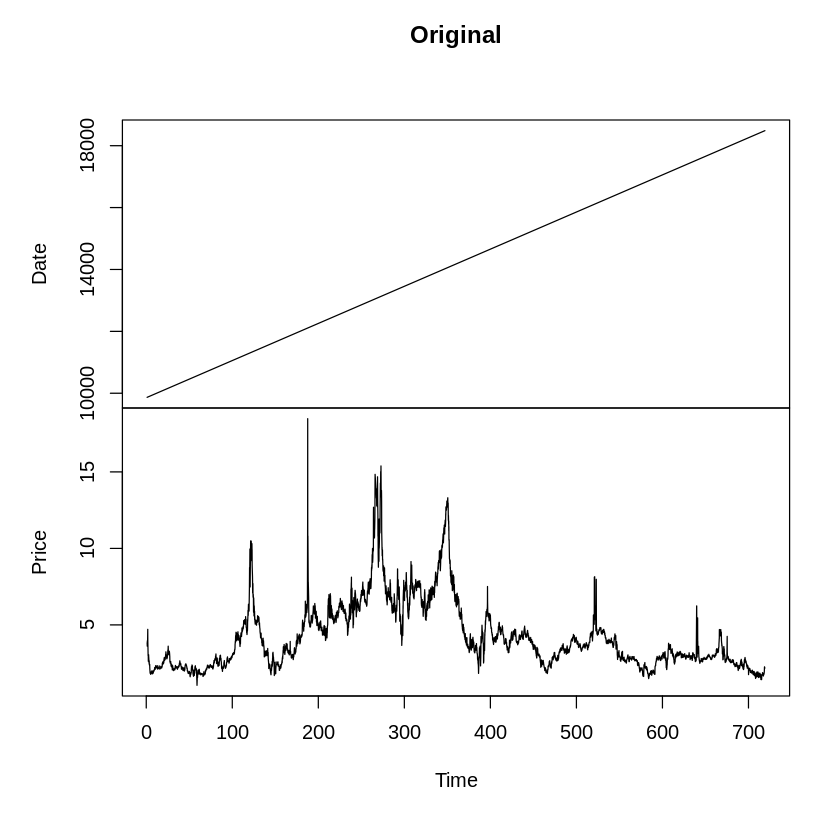

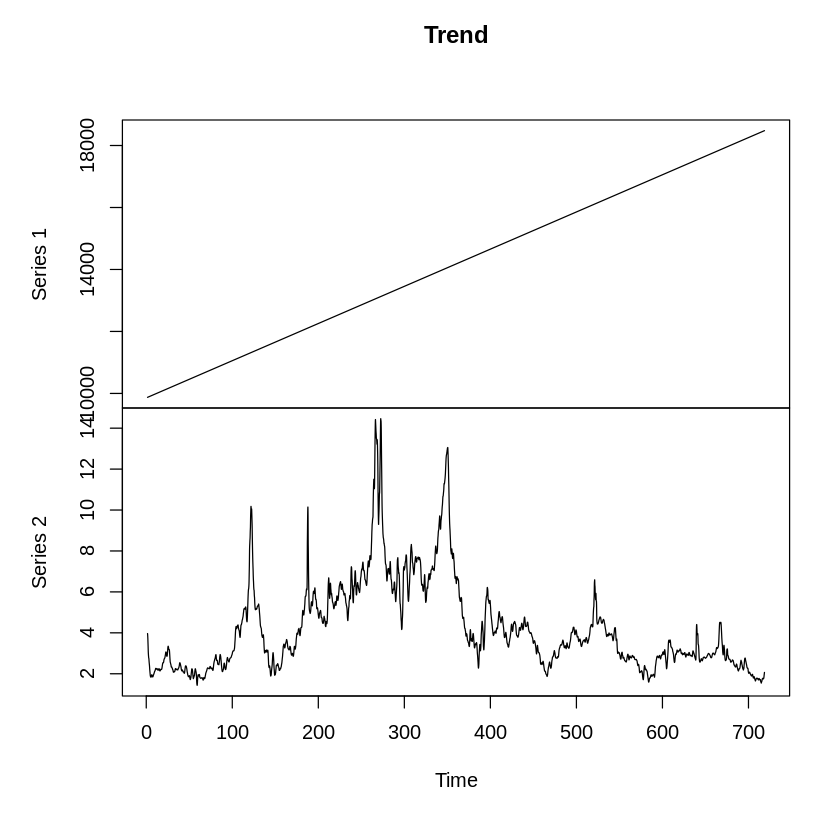

In [ ]:
#docompose  on full dataset
data_decomposed<-decompose(TS_data)
# Plot the original time series
plot(TS_data, main = "Original", ylab = "Value")

# Plot the trend component
plot(data_decomposed$trend, main = "Trend", ylab = "Value")

In the plot of the trend component extracted from the decomposed time series data, we observe a discernible pattern that represents the underlying trend in the original data. The trend appears to exhibit non-linear behavior over time, indicating **non stationarity** in Data

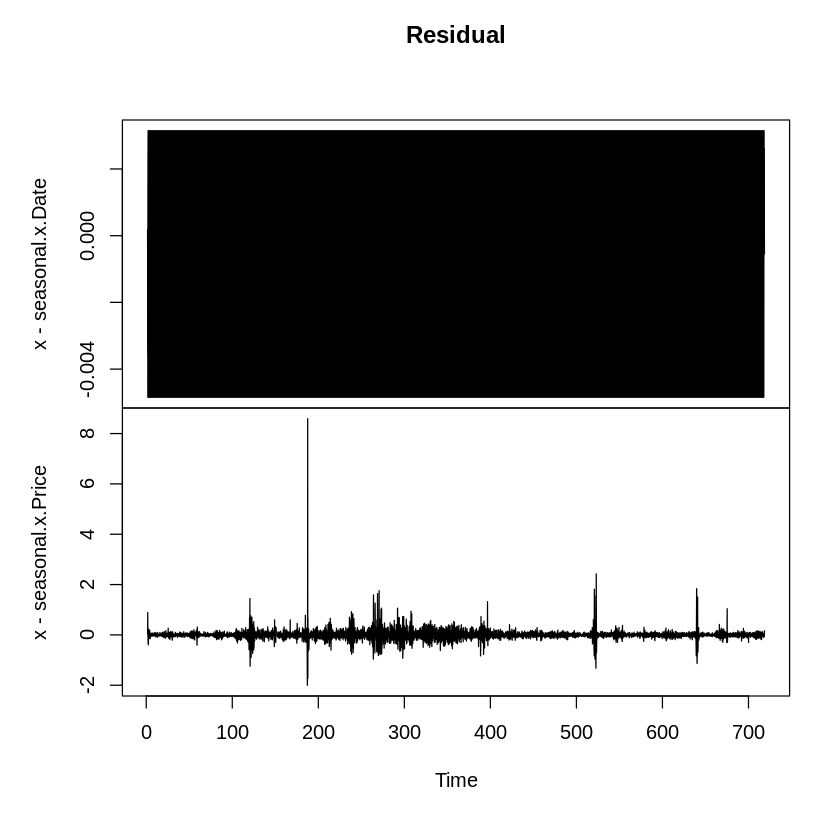

In [ ]:
#the residual component
plot(data_decomposed$random, main = "Residual", ylab = "Value")

The Random part in data seem to have a constant mean and variance

<h2>Train and test data plots</h2>

In [ ]:
data_train

,Date,Price
,<date>,<dbl>
1,1997-01-07,3.820000
2,1997-01-08,3.800000
3,1997-01-09,3.610000
4,1997-01-10,3.920000
5,1997-01-11,3.946667
6,1997-01-12,3.973333
7,1997-01-13,4.000000
8,1997-01-14,4.010000
9,1997-01-15,4.340000


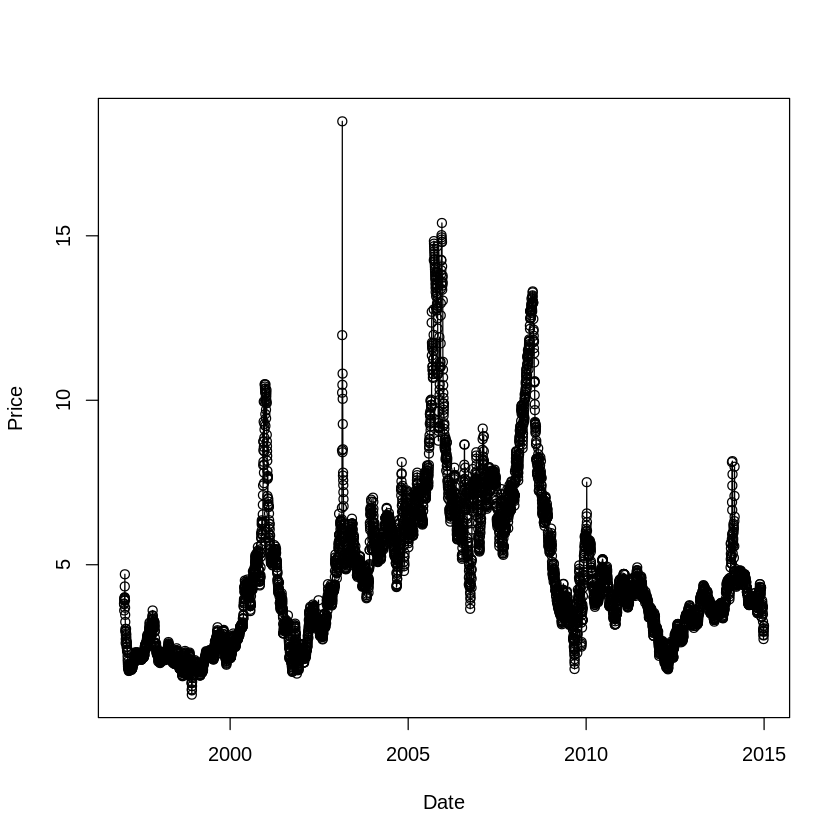

In [ ]:
#plot train data
plot(data_train$Date,data_train$Price, type = "o",
     ylab = "Price", xlab = "Date")

In [ ]:
#data test
data_test

,Date,Price
,<date>,<dbl>
6569,2015-01-01,3.075000
6570,2015-01-02,3.010000
6571,2015-01-03,3.080000
6572,2015-01-04,3.150000
6573,2015-01-05,3.220000
6574,2015-01-06,2.980000
6575,2015-01-07,3.080000
6576,2015-01-08,2.920000
6577,2015-01-09,2.960000


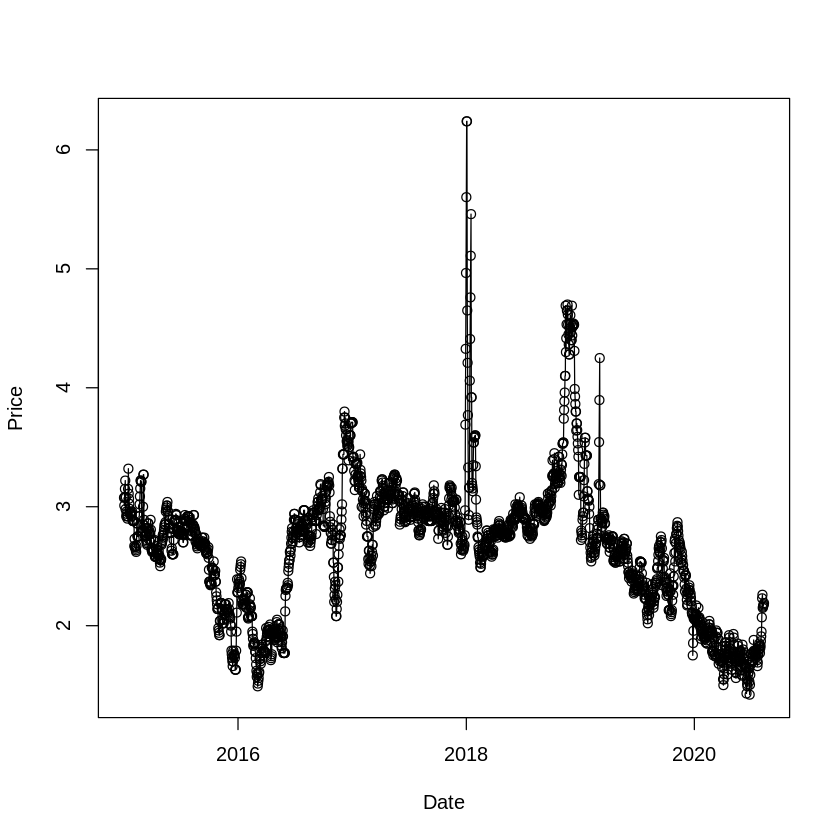

In [ ]:
#plot test data
plot(data_test$Date, data_test$Price, type = "o",
     ylab = "Price", xlab = "Date")

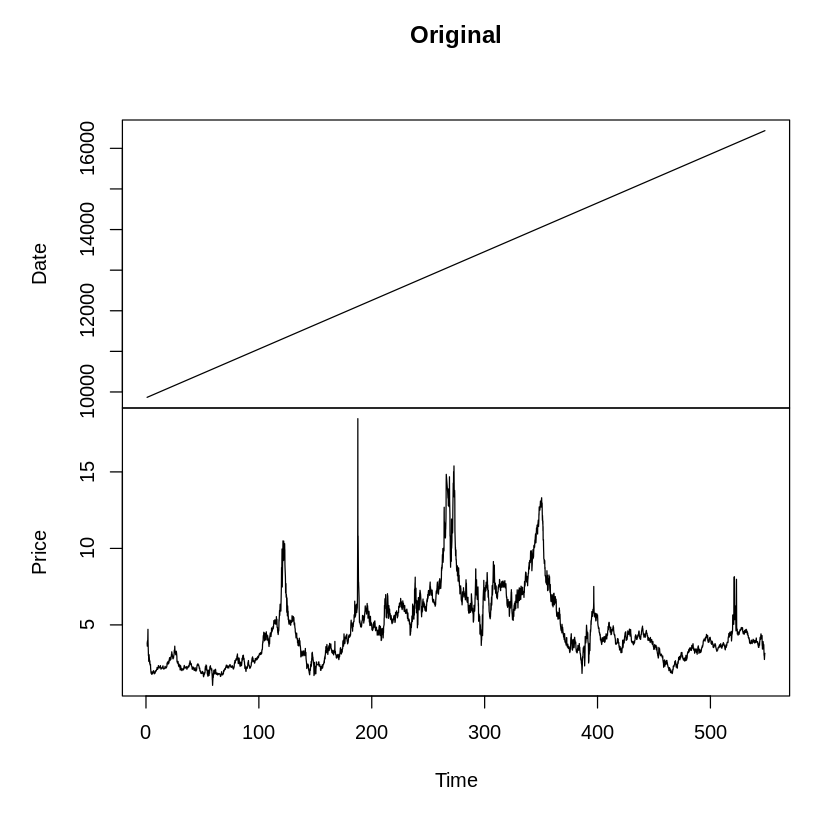

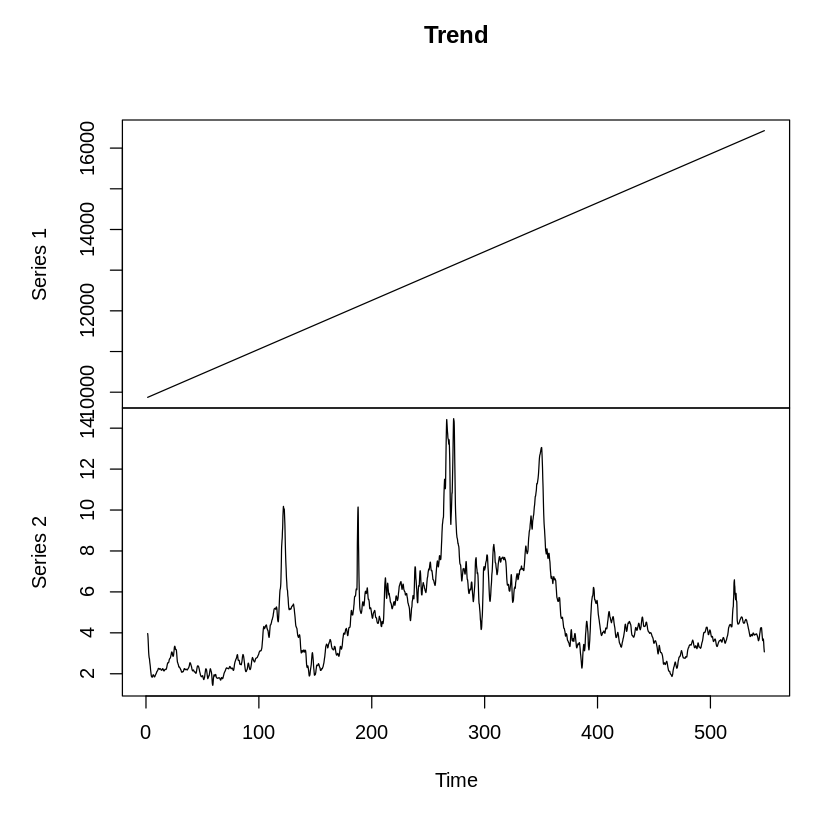

In [ ]:
#decompose on train data
TS_data_train <- ts(data_train, frequency = 12)
data_train_decomposed<-decompose(TS_data_train)
# Plot the original time series
plot(TS_data_train, main = "Original", ylab = "Value")

# Plot the trend component
plot(data_train_decomposed$trend, main = "Trend", ylab = "Value")


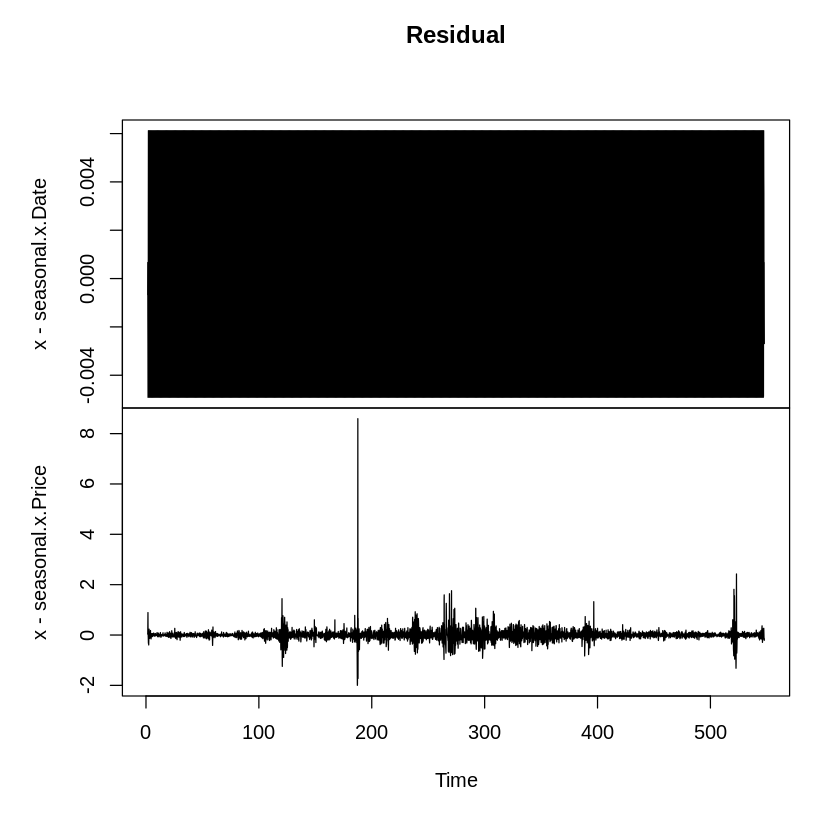

In [ ]:
#see residuals
plot(data_train_decomposed$random, main = "Residual", ylab = "Value")

The Random part in Train data seem to have a constant mean and variance

<h2>ACF and PACF plots</h2>

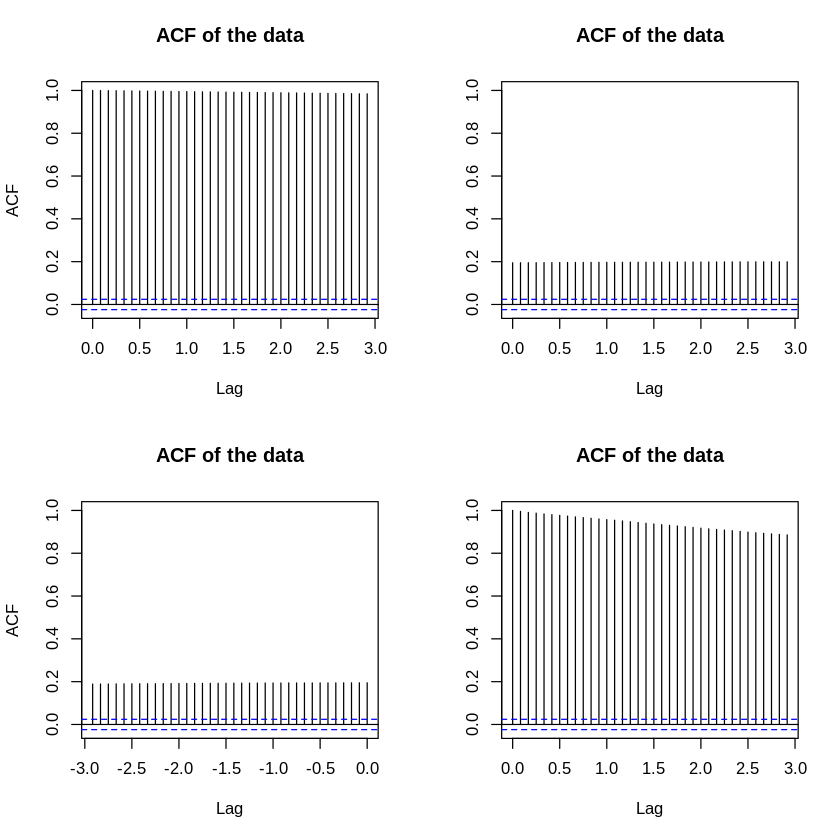

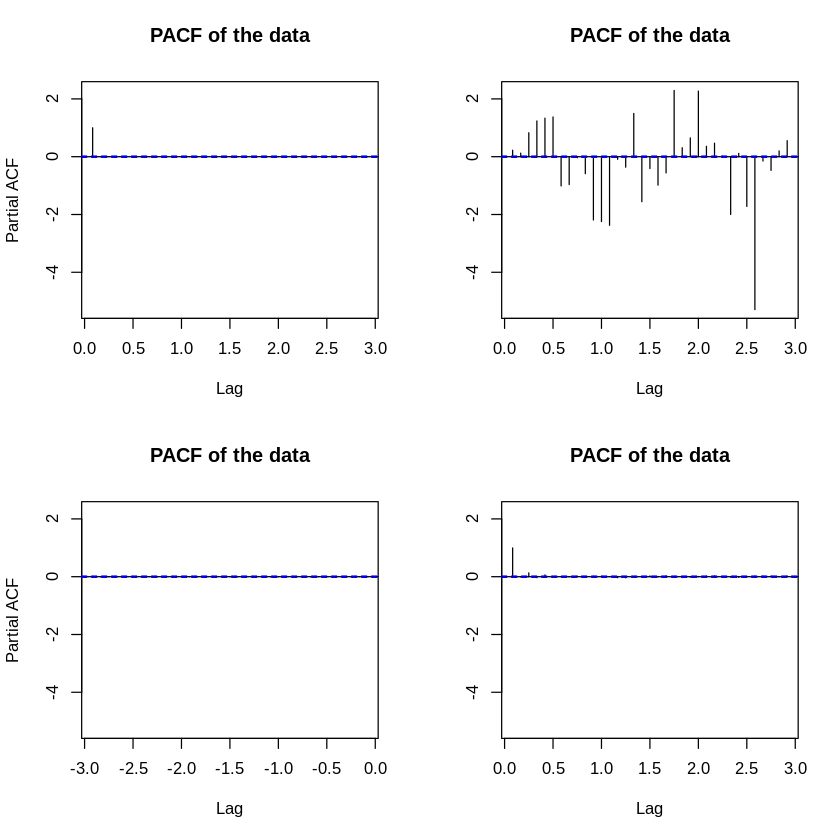

In [ ]:
#the ACF function
par(mfrow=c(2,1))
acf(TS_data_train, main="ACF of the data")
#the PACF function
pacf(TS_data_train, main="PACF of the data")

<b>Results discussion :</b>

*   The Partial Autocorrelation Function (PACF) exhibits a sinusoidal shape, which suggests the presence of a cyclical or periodic pattern in the data. This sinusoidal shape in the PACF indicates that there may be a seasonal component influencing the time series, contributing to periodic fluctuations in the data.
*   On the other hand, the Autocorrelation Function (ACF) shows decaying tails
*   However, both the PACF and ACF do not provide a clear indication of the lag structure for modeling the time series using autoregressive (AR) or moving average (MA) processes. The lack of clear peaks or significant correlations at specific lags suggests that a simple AR or MA model may not be sufficient to capture the dynamics of the time series.

<b>Conclusion:</b>

*   Further study and analysis are needed to identify the appropriate lag structure and determine the best model for the time series data,these issues will be addressed in subsequent sections of this notebook to develop a more accurate and effective forecasting model.




<h1>Model specification</h1>

Checking the variance and mean

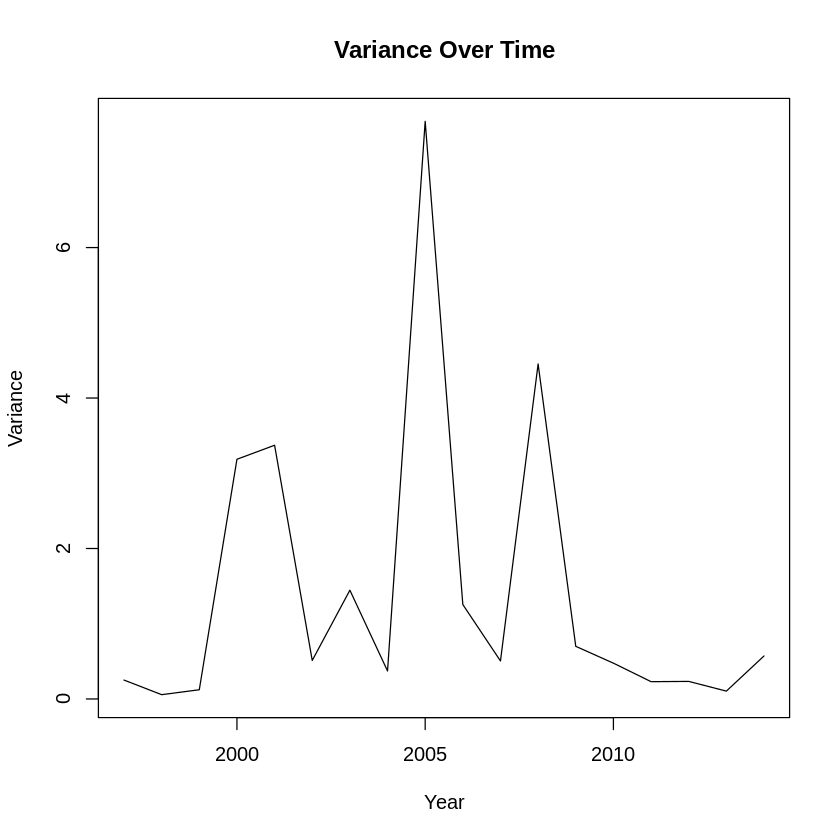

In [15]:
# Extract year from date
data_train$year <- format(data_train$Date, "%Y")
var_by_year <- aggregate(Price ~ year, data = data_train, FUN = var)

# Plot variance by year
plot(var_by_year$year, var_by_year$Price, type = "l",
     xlab = "Year", ylab = "Variance", main = "Variance Over Time")


The **variance** is not constant over time ,thus **stabilization** is required as first step

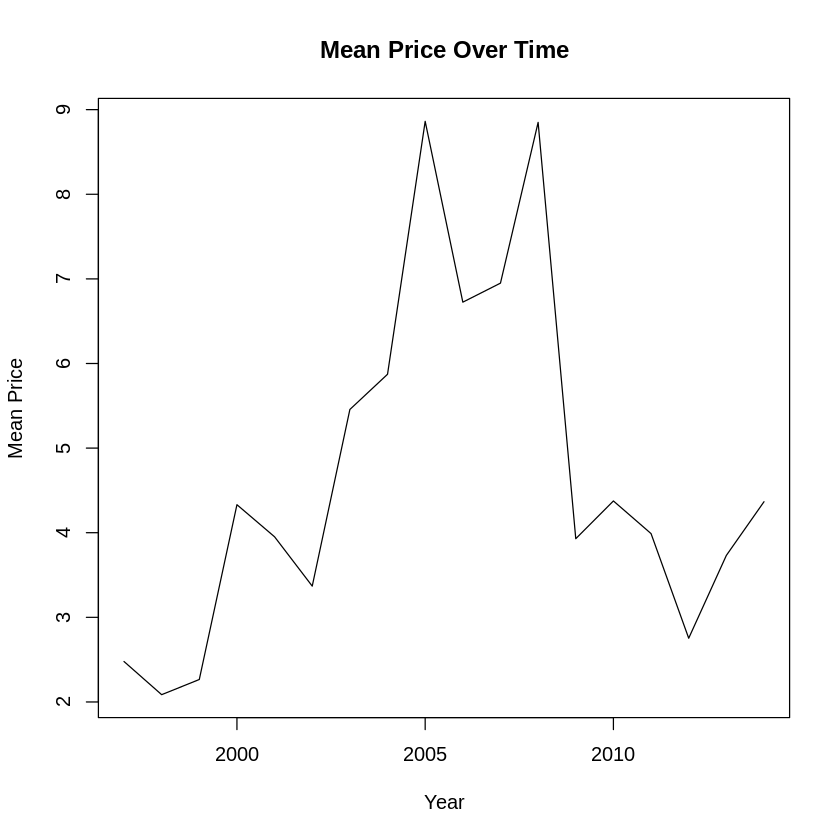

In [16]:
#the mean
mean_by_year <- aggregate(Price ~ year, data = data_train, FUN = mean)
# Plot mean by year
plot(mean_by_year$year, mean_by_year$Price, type = "l",
     xlab = "Year", ylab = "Mean Price", main = "Mean Price Over Time")


We notice that there is a **trend** in the **mean** ,so the data is **not stationary** as first anaylsis shows

<h2>Data transformation</h2>

Variance stabilization transformation:
Applying a transformation to address nonconstant variance
is regarded as a first step.
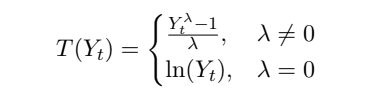

The optimal value of λ is determined by maximizing the log-likelihood function or minimizing the variance of the transformed series.

[1] -0.2626263

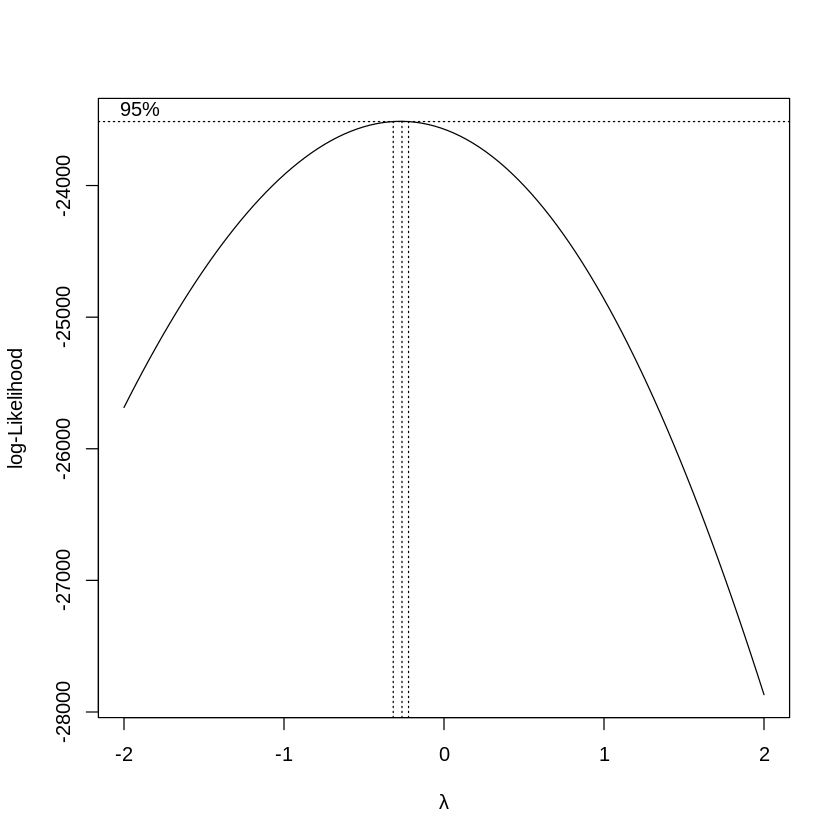

In [ ]:
#The box cox test
library(MASS)
bc <- boxcox(Price ~ Date, data = TS_data_train)
lambda <- bc$x[which.max(bc$y)]
lambda

The lambda chosen is : -0.262626262626263

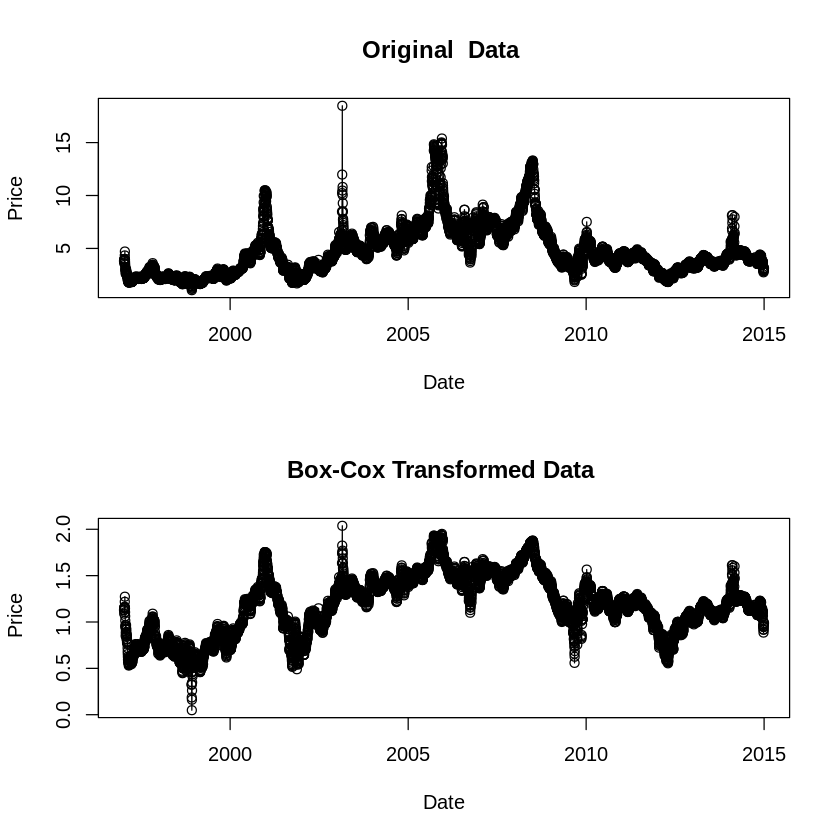

In [ ]:
# Apply Box-Cox transformation with optimal lambda
transformed_data <- ((data_train$Price^lambda - 1) / lambda)

par(mfrow = c(2, 1))
#original data
plot(data_train$Date,data_train$Price, type = "o",
     ylab = "Price", xlab = "Date",main = "Original  Data ")
#Transformed data
plot(data_train$Date, transformed_data, type = "o", xlab = "Date", ylab = " Price",
     main = "Box-Cox Transformed Data ")

After applying the Box-Cox transformation to stabilize the variance, the data indeed shows a stable variance. However, upon inspecting the transformed data, it is evident that the mean is not constant, indicating non-stationarity.

<h2>Try linear model</h2>

Linear model

In [ ]:
#fit a linear line to the data
model = lm(transformed_data~data_train$Date)
summary(model)


Call:
lm(formula = transformed_data ~ data_train$Date)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9853 -0.2405 -0.0619  0.2654  0.9193 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.556e-01  2.626e-02   17.35   <2e-16 ***
data_train$Date 5.473e-05  1.977e-06   27.69   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3037 on 6566 degrees of freedom
Multiple R-squared:  0.1046,	Adjusted R-squared:  0.1044 
F-statistic: 766.8 on 1 and 6566 DF,  p-value: < 2.2e-16


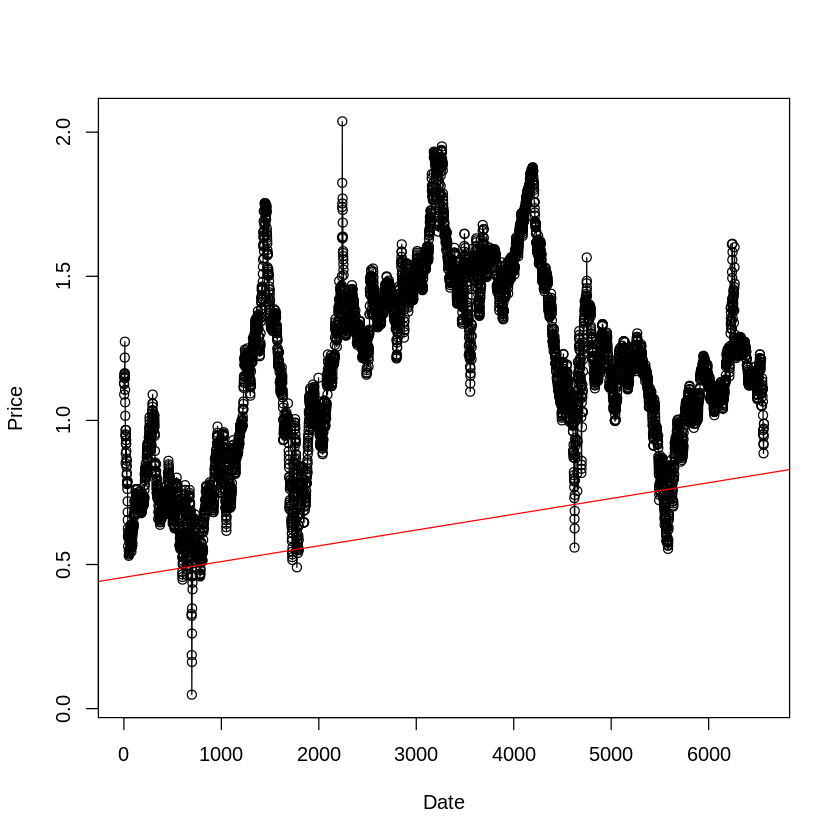

In [ ]:
plot(transformed_data, ylab="Price", xlab="Date", type="o")
points(y=transformed_data, x=data_train$Date)
abline(model,col="red")

The attempt to fit a linear line to the data failed to capture the underlying pattern.

<h2>Checking Stationarity</h2>




Null Hypothesis: The series has a unit root (value of a =1)(not stationary)

Alternate Hypothesis: The series has no unit root (stationary)


In [ ]:
#import the needed library
library(tseries)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
# Perform ADF test for stationarity
adf_result <- adf.test(transformed_data)

print(adf_result)


	Augmented Dickey-Fuller Test

data:  transformed_data
Dickey-Fuller = -2.7679, Lag order = 18, p-value = 0.2531
alternative hypothesis: stationary



The p-value is 0.2531, which is way greater than the threshold (0.05). Hence the null-hypothesis is accepted. It suggests the time series have a unit root, meaning that the time series is not stationary even after stabilising the variance, which means the need for differencing

<h2>Applying difference</h2>

Differencing data,from a statistical context, refers to the process of transforming non-stationary data to make it stationary by removing its non-constant trend.Differencing removes the changes in the level of a time series, eliminating the trend.

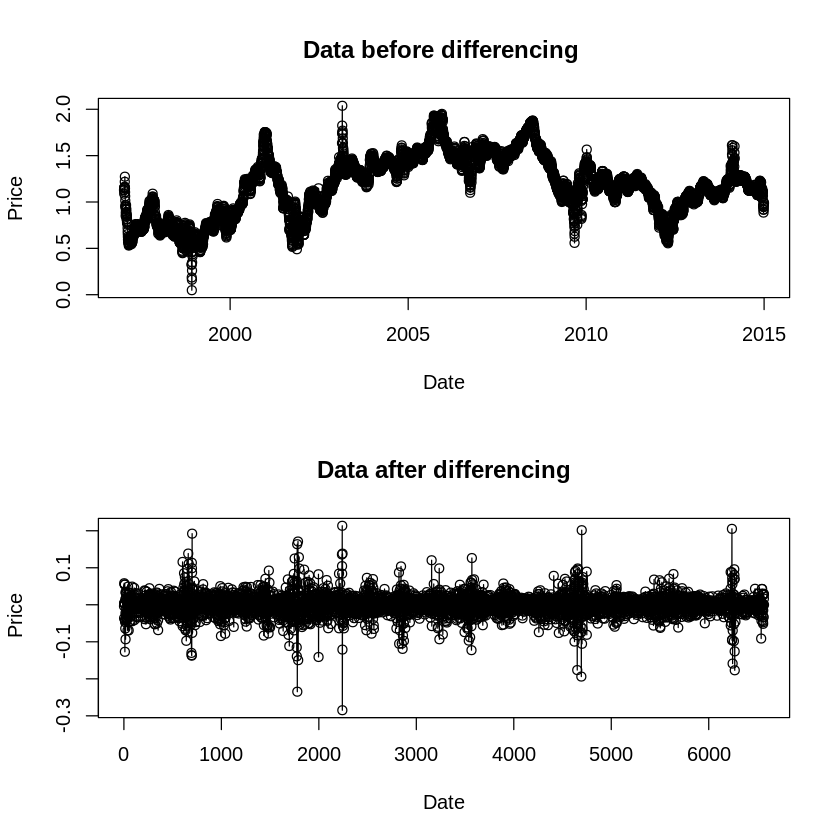

In [ ]:
#apply 1 difference
diff_1 <- diff(transformed_data)
par(mfrow = c(2, 1))
#plot original train data
plot(data_train$Date,transformed_data, type = "o",
     ylab = "Price", xlab = "Date",main = "Data before differencing ")
#PLot after Differencing
plot(time(diff_1), diff_1, type = "o", xlab = "Date", ylab = " Price",
     main = " Data after differencing ")

After differencing the data once, we observe that the resulting time series exhibits a stable constant mean. This indicates that the first-order differencing operation has effectively removed the trend component from the original data, resulting in a stationary series with a constant mean

In [ ]:
# Perform ADF test for stationarity
adf_result_diff_1 <- adf.test(diff_1)

print(adf_result_diff_1)

Warning message in adf.test(diff_1):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  diff_1
Dickey-Fuller = -19.846, Lag order = 18, p-value = 0.01
alternative hypothesis: stationary



After differencing ,the mean is constant , hence the stationary data is achieved which is the case after applying the Augmented Dickey-Fuller Test returning the value 0.01 which is less than 0.05 ,Hence the null-hypothesis is rejected. confirming that the time series is  stationary

<h2>ACF and PACF on transformed data (after variance stabilization )</h2>

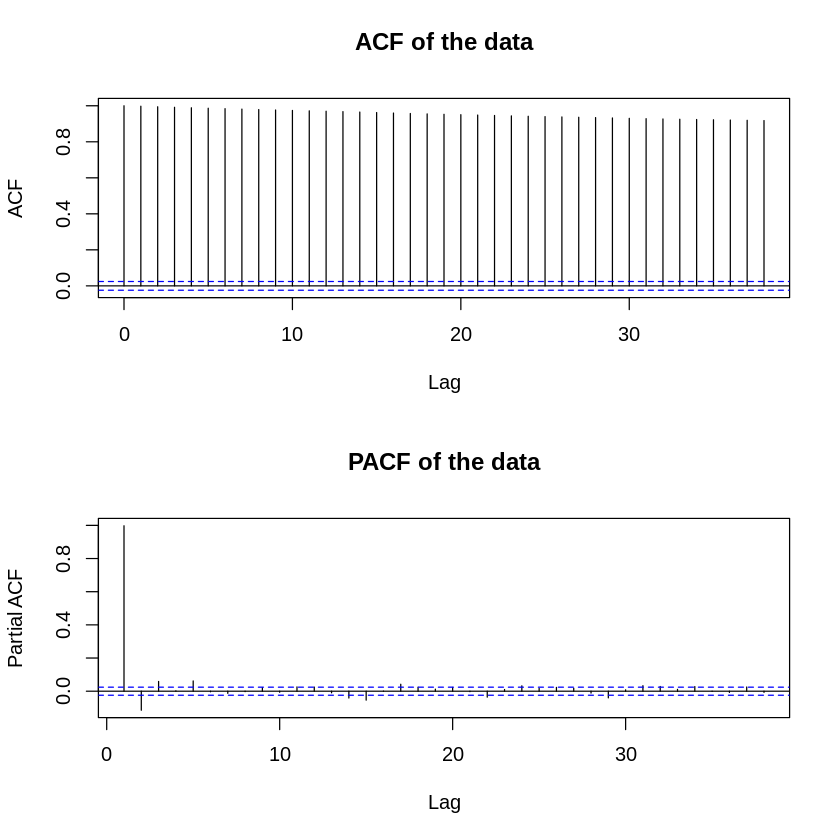

In [ ]:
#the ACF function
par(mfrow=c(2,1))
acf(transformed_data, main="ACF of the data")
#the PACF function
pacf(transformed_data, main="PACF of the data")

**The ACF and PACF analysis:**

still showing not clear model to specify ,This involve trying different combinations of **ARIMA** (AutoRegressive Integrated Moving Average) models with varying orders of differencing (d), autoregressive (p), and moving average (q) components.


<h2>Initial Results</h2>

So far the results we got are that:


*   The Train data is not Stationary (results from ADF test )
*   The data is transformed using Box cox and data is with constant variance
*   The mean in data is not constant ,and there exist a trend in it ,thus applying one difference gave data with constant mean.
*   The AFC and PACF patterns suggests a mixed ARMA (AutoRegressive Moving Average) process, indicating both autoregressive and moving average components in the data.



<h2>Looking for best model</h2>

We will use ARIMA for forecasting our time series. ARIMA is also denoted as ARIMA(p,d,q) where p,d,q accounts for seasonality, trend and noise in the time series data

*   Auto-Regressive: Lags of the variable itself
*   Integrated: Differencing steps required to make stationary
*   Moving Average: Lags of previous information shocks


Parameter Selection


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar




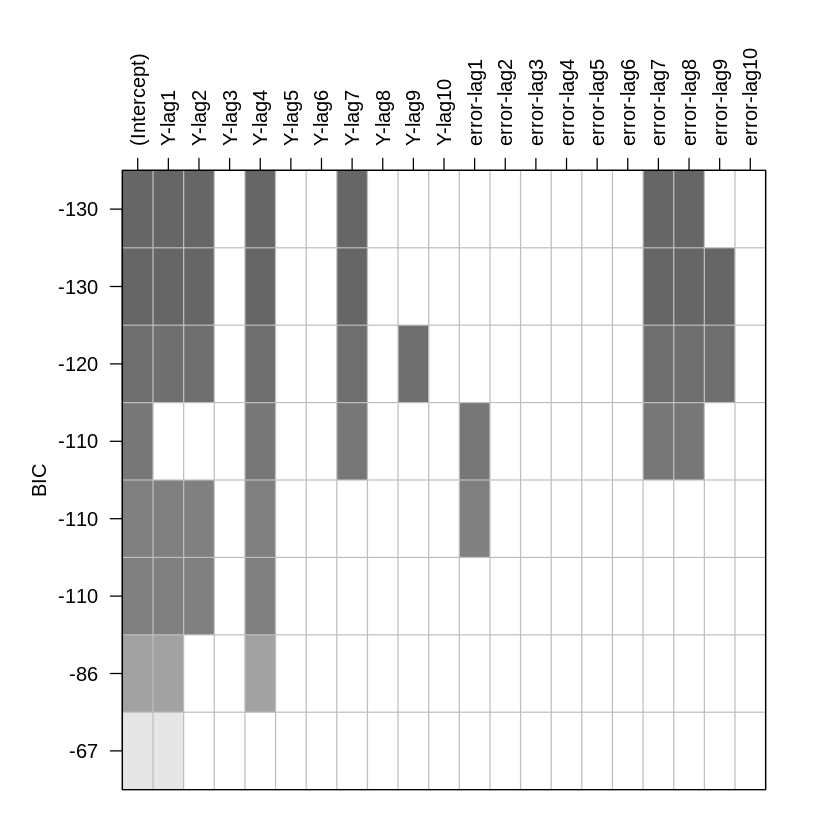

In [ ]:
# Load the TSA package
library(TSA)
plot(armasubsets(diff(transformed_data), 10, 10))

<b>NOTE:</b>
The plot suggests  the <b>ARIMA(7,1,8)</b> model.This model was considered during the analysis process, but it yielded similar results to the ARIMA(2,1,2) model in terms of forecasting performance. Therefore, it was not explicitly mentioned in the discussion. The ARIMA(2,1,2) model was ultimately chosen as a representative model due to its simplicity and comparable forecasting accuracy.

In [ ]:
# Load the forecast package
library(forecast)

# Define the range of parameters for ARIMA model
p <- d <- q <- seq(0, 2)
# Create a data frame of all possible combinations of non-seasonal parameters
pdq <- expand.grid(p = p, d = d, q = q)

# vector to store AIC values
result <- numeric(nrow(pdq))

for (i in 1:nrow(pdq)) {
  param <- as.numeric(pdq[i, ])
  tryCatch({
    fit <- arima(transformed_data, order = param)
    result[i] <- fit$aic
    print(paste("ARIMA", paste(param, collapse = ","), "- AIC:", fit$aic))
  }, error = function(e) {
    next
  })
}

# Find the index of the best model (with minimum AIC)
best_model_index <- which.min(result)

# Extract the best model parameters among all combinations
best_param <- as.numeric(pdq[best_model_index, ])

# Print the best model parameters and the corresponding AIC value
print(paste("Best ARIMA model:", paste(best_param, collapse = ","), "- AIC:", result[best_model_index]))


Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 



[1] "ARIMA 0,0,0 - AIC: 3710.8187982112"
[1] "ARIMA 1,0,0 - AIC: -31123.1348951549"
[1] "ARIMA 2,0,0 - AIC: -31209.9229358753"
[1] "ARIMA 0,1,0 - AIC: -31118.7164375912"
[1] "ARIMA 1,1,0 - AIC: -31203.3746599516"
[1] "ARIMA 2,1,0 - AIC: -31227.0389785691"
[1] "ARIMA 0,2,0 - AIC: -27360.2652913013"
[1] "ARIMA 1,2,0 - AIC: -28553.694870392"
[1] "ARIMA 2,2,0 - AIC: -29316.0199309146"
[1] "ARIMA 0,0,1 - AIC: -4885.63099241943"
[1] "ARIMA 1,0,1 - AIC: -31220.6152016385"
[1] "ARIMA 2,0,1 - AIC: -31236.2699851434"
[1] "ARIMA 0,1,1 - AIC: -31214.1039013881"
[1] "ARIMA 1,1,1 - AIC: -31230.5234344403"
[1] "ARIMA 2,1,1 - AIC: -31228.8696869418"
[1] "ARIMA 0,2,1 - AIC: -31102.1940396482"
[1] "ARIMA 1,2,1 - AIC: -31187.0812110005"
[1] "ARIMA 2,2,1 - AIC: -31210.6211293643"
[1] "ARIMA 0,0,2 - AIC: -11480.7448368671"
[1] "ARIMA 1,0,2 - AIC: -31234.6242627703"
[1] "ARIMA 2,0,2 - AIC: -31234.9900174318"
[1] "ARIMA 0,1,2 - AIC: -31229.1954739987"
[1] "ARIMA 1,1,2 - AIC: -31234.8918733149"
[1] "ARIMA 2,1

So after running all the combinations we notice having best values on ARIMA(2,1,2) which mean:


*   AR(2)
*   Differencing 1
*   MA(2)

Which was the case with doing the analysis above on each element ( Differencing once ,Auto-Regressive 2)

Condidates model :


*   ARIMA(2,1,0)
*   ARIMA(2,1,1)
*   ARIMA(2,1,2)

Consider the use of SARIMA model and auto ARIMA



<h1>Fitting and Diagnostics</h1>

<h2>Prepare the model and fitting</h2>

We will use ARIMA for forecasting our time series.Among the selected ones




In [ ]:
library(forecast)

In [ ]:
#to time series
TS_transformed_data <- ts(transformed_data, frequency = 12)

<h2>Condidate model 1:ARIMA(2,1,0)</h2>

In [ ]:
# Fit ARIMA model 2_1_0
arima_model_2_1_0 <-Arima(TS_transformed_data, order = c(2,1,0))

# Print summary of the ARIMA model
summary(arima_model_2_1_0)

Series: TS_transformed_data 
ARIMA(2,1,0) 

Coefficients:
         ar1      ar2
      0.1216  -0.0625
s.e.  0.0123   0.0123

sigma^2 = 0.0005038:  log likelihood = 15615.52
AIC=-31225.04   AICc=-31225.04   BIC=-31204.67

Training set error measures:
                        ME       RMSE        MAE         MPE    MAPE      MASE
Training set -2.024101e-05 0.02244038 0.01352521 -0.05995561 1.36419 0.2412401
                      ACF1
Training set -0.0002314373

We notice that the model <b>arima_model_2_1_0</b>  have close AIC as the best selected above

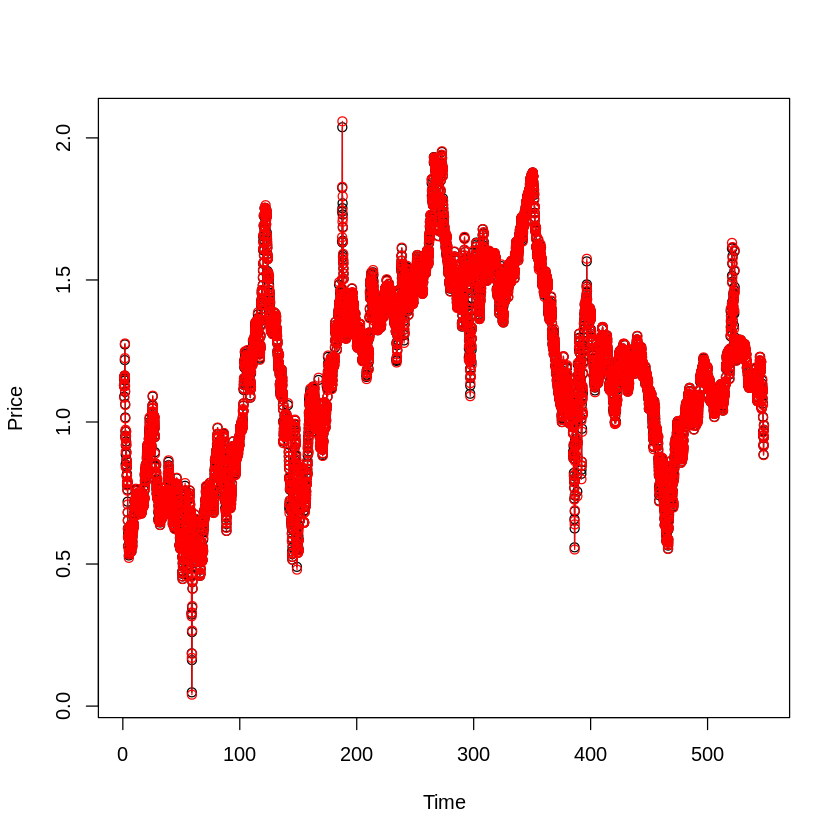

In [ ]:
# Plot original data
plot(TS_transformed_data, ylab = "Price", type = "o", ylim = range(c(fitted(arima_model_2_1_0), transformed_data)))

# Overlay fitted values in red
lines(fitted(arima_model_2_1_0), col = "red", type = "o")

This model shows that the model follows the same patters as original data

<b>Residuals Analysis</b>


	Ljung-Box test

data:  Residuals from ARIMA(2,1,0)
Q* = 118.25, df = 22, p-value = 3.664e-15

Model df: 2.   Total lags used: 24



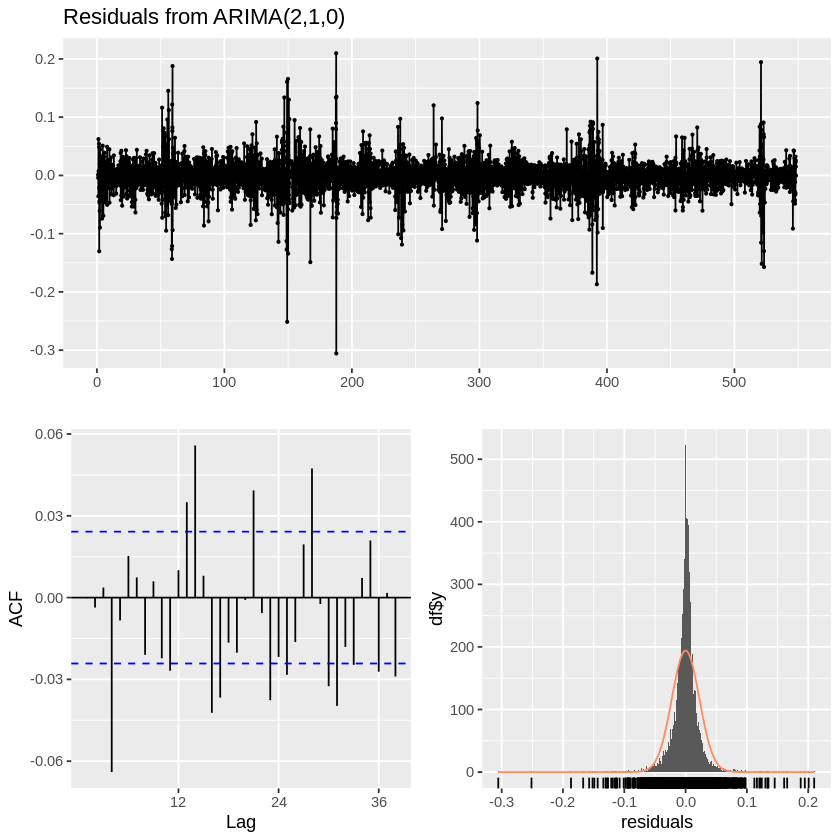

In [ ]:
checkresiduals(arima_model_2_1_0)

<b>Normality test: </b>

<b>Normality test Shapiro_Wilk test</b>

-Null Hypothesis: The residuals of the ARIMA model are normally distributed.

-Alternate Hypothesis: The residuals of the ARIMA model are not normally distributed.

In [ ]:
shapiro.test(residuals(arima_model_2_1_0)[0:5000])


	Shapiro-Wilk normality test

data:  residuals(arima_model_2_1_0)[0:5000]
W = 0.84201, p-value < 2.2e-16


<b>Conclusion after the residuals analysis on model ARIMA(2,1,0):</b>


1.   The mean and variance are constant
2.   Does not follow a normal distribution (failed on shapiro test  )

SO we conclude that : we can say that the estimators on the ARIMA(2,1,0) model are non bias

<h2>Condidate model 2:ARIMA(2,1,1)</h2>

In [ ]:
# Fit ARIMA model 2_1_1
arima_model_2_1_1 <-Arima(TS_transformed_data, order = c(2,1,1))

# Print summary of the ARIMA model
summary(arima_model_2_1_1)

Series: TS_transformed_data 
ARIMA(2,1,1) 

Coefficients:
          ar1     ar2     ma1
      -0.5272  0.0231  0.6502
s.e.   0.1215  0.0244  0.1204

sigma^2 = 0.0005036:  log likelihood = 15617.43
AIC=-31226.87   AICc=-31226.86   BIC=-31199.71

Training set error measures:
                        ME       RMSE        MAE         MPE     MAPE      MASE
Training set -1.945663e-05 0.02243383 0.01354072 -0.05758419 1.364556 0.2415167
                     ACF1
Training set 0.0006280356

We notice on this model that the BIC is greated than what was chosen to be best ( greated than -31240.2574430809),for the estimators ,we check the residuals below

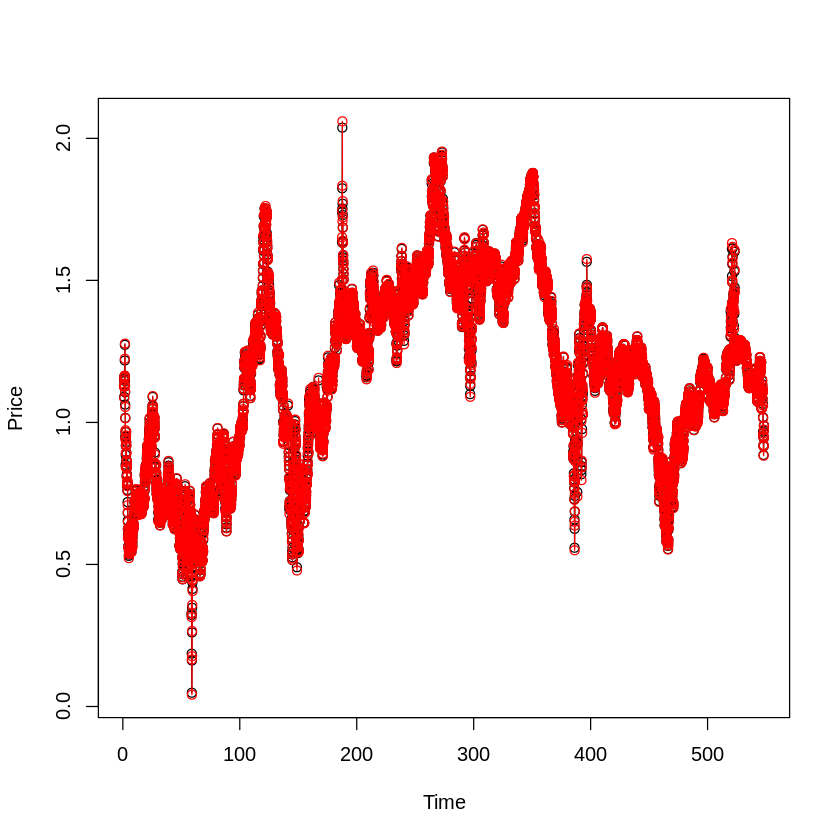

In [ ]:
# Plot original data
plot(TS_transformed_data, ylab = "Price", type = "o", ylim = range(c(fitted(arima_model_2_1_1), transformed_data)))

# Overlay fitted values in red
lines(fitted(arima_model_2_1_1), col = "red", type = "o")

The plot of the ARIMA(2,1,1) model overlaid on the original data reveals that the model captures the patterns and trends present in the data. However, there are noticeable discrepancies between them

<b>Residuals Analysis</b>


	Ljung-Box test

data:  Residuals from ARIMA(2,1,1)
Q* = 119.12, df = 21, p-value = 9.992e-16

Model df: 3.   Total lags used: 24



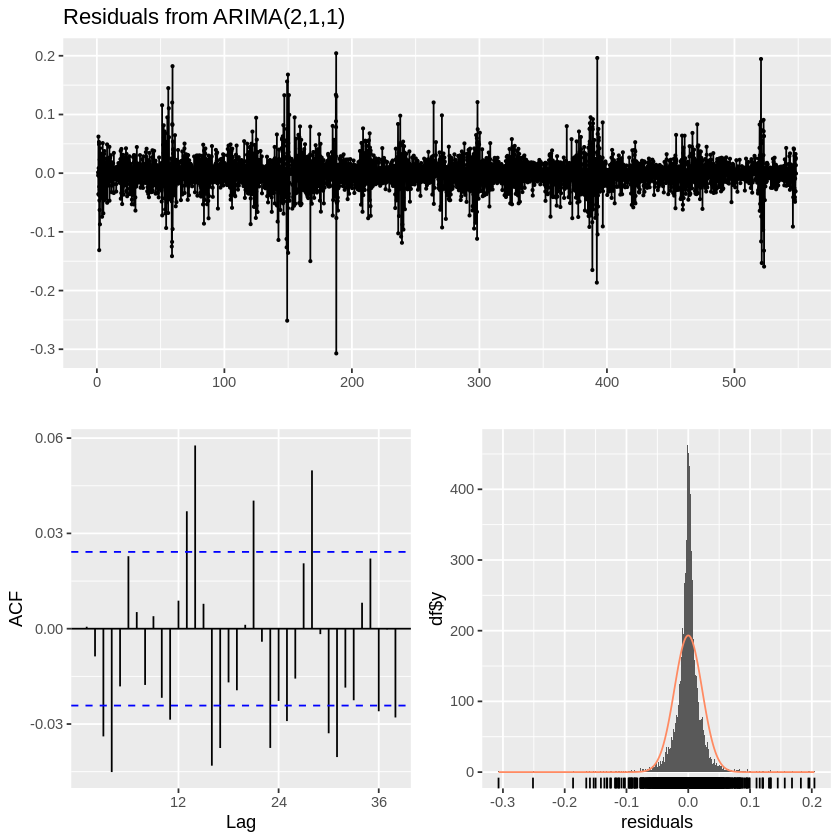

In [ ]:
checkresiduals(arima_model_2_1_1)

From the plots above, it seems that the residuals have constant zero mean ,and constant variance ,however the ACF failed to capture which lag K is our residuals ,which is not a behaviour of a white noise process

<b>Normality test: </b>

<b>Normality test Shapiro_Wilk test</b>

-Null Hypothesis: The residuals of the ARIMA model are normally distributed.

-Alternate Hypothesis: The residuals of the ARIMA model are not normally distributed.

In [ ]:
shapiro.test(residuals(arima_model_2_1_1)[0:5000])


	Shapiro-Wilk normality test

data:  residuals(arima_model_2_1_1)[0:5000]
W = 0.84363, p-value < 2.2e-16


The residuals failed to pass <b>shapiro test</b> ,hence we conclude that they are not normally distributed

<b>Conclusion after the residuals analysis on model ARIMA(2,1,1):</b>


1.   The mean and variance are constant
2.   The residuals have zero mean
3.   Failed to pass shapiro test hence not normally distributed
SO we conclude that : we can say that the estimators on the ARIMA(2,1,1) model are <b> non bias </b>

<h2>Apply best model on data accoring to AIC: ARIMA(2,1,2)</h2>

This model was suggusted to be the best by the AIC test

In [ ]:
# Fit ARIMA model
arima_model_2_1_2 <-Arima(TS_transformed_data, order = c(2,1,2))

# Print summary of the ARIMA model
summary(arima_model_2_1_2)

Series: TS_transformed_data 
ARIMA(2,1,2) 

Coefficients:
         ar1     ar2      ma1      ma2
      0.6087  0.3222  -0.4905  -0.4559
s.e.  0.0886  0.0883   0.0837   0.0834

sigma^2 = 0.0005026:  log likelihood = 15624.13
AIC=-31238.26   AICc=-31238.25   BIC=-31204.31

Training set error measures:
                        ME       RMSE        MAE        MPE     MAPE      MASE
Training set -2.148239e-05 0.02241092 0.01357171 -0.0684319 1.368787 0.2420696
                    ACF1
Training set 0.002837817

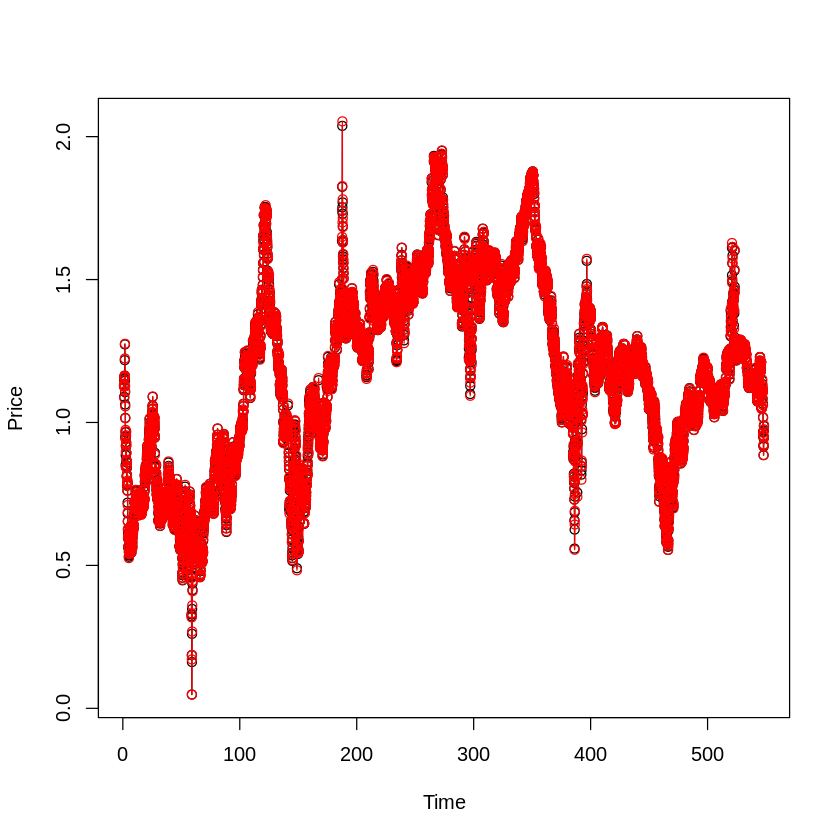

In [ ]:
# Plot original data
plot(TS_transformed_data, ylab = "Price", type = "o", ylim = range(c(fitted(arima_model_2_1_2), transformed_data)))

# Overlay fitted values in red
lines(fitted(arima_model_2_1_2), col = "red", type = "o")

After overlaying the fitted values from the ARIMA model on the original data, it's evident that the model closely follows the pattern of the data. The red line representing the fitted values aligns well with the actual data points, indicating that the ARIMA model captures the underlying structure of the time series effectively. This suggests that the ARIMA model provides a good fit to the data and can be relied upon for forecasting future values.

<h3>Residuals analysis on ARIMA(2,1,2)</h3>


	Ljung-Box test

data:  Residuals from ARIMA(2,1,2)
Q* = 106.24, df = 20, p-value = 9.459e-14

Model df: 4.   Total lags used: 24



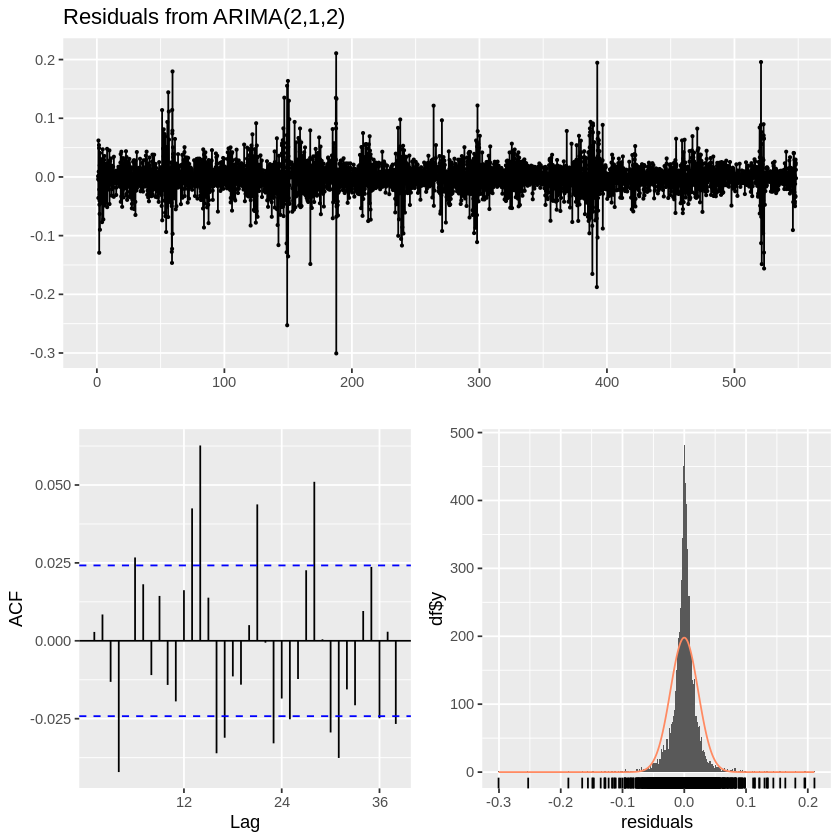

In [ ]:
checkresiduals(arima_model_2_1_2)

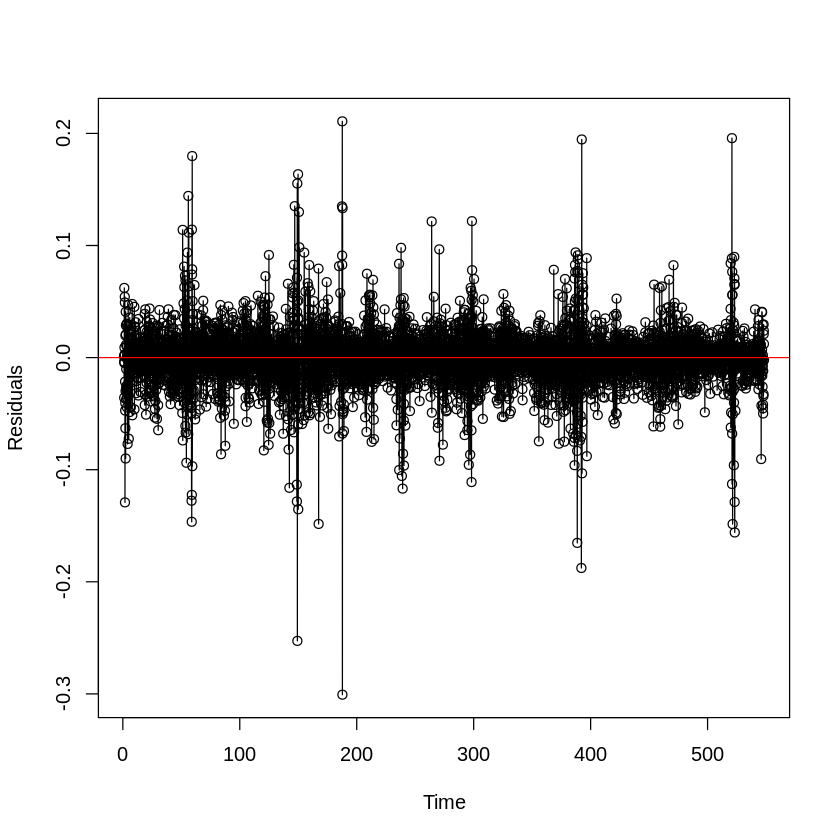

In [ ]:
# Plot residuals
plot(residuals(arima_model_2_1_2), ylab = "Residuals", xlab = "Time", type = "o")
abline(h = 0,col="red")

The **residuals** plot provides valuable insights into the performance of the ARIMA model(2,1,2). It appears that the residuals are centered around zero, indicating that the model captures the overall mean of the data adequately.

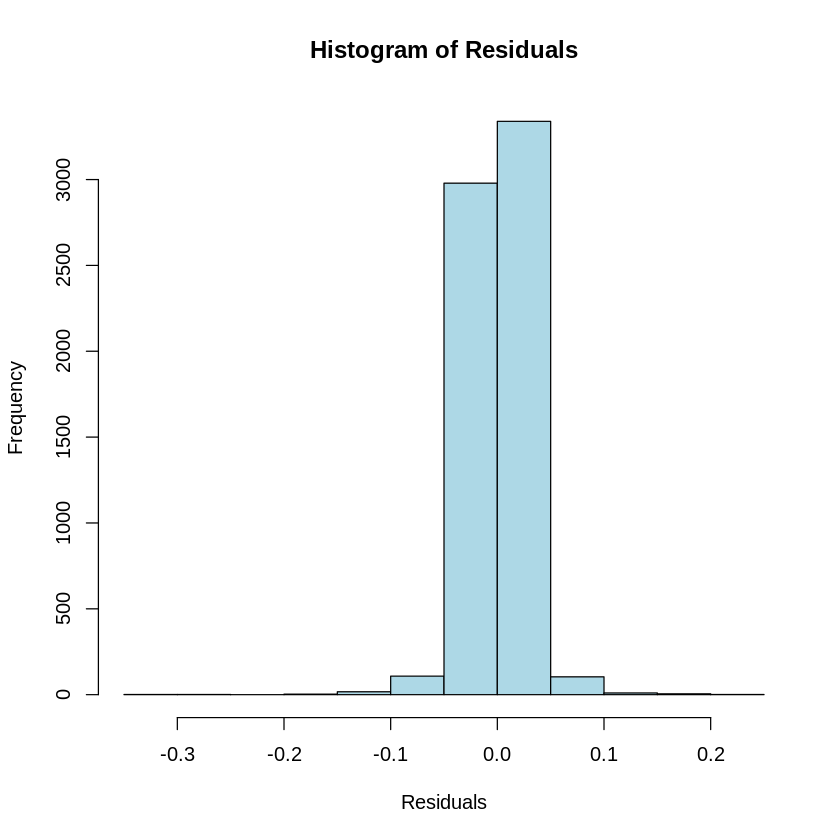

In [ ]:
hist(residuals(arima_model_2_1_2), main="Histogram of Residuals", xlab="Residuals", ylab="Frequency", col="lightblue", border="black")


The residuals seems to be normally distributed

ACF on the residuals

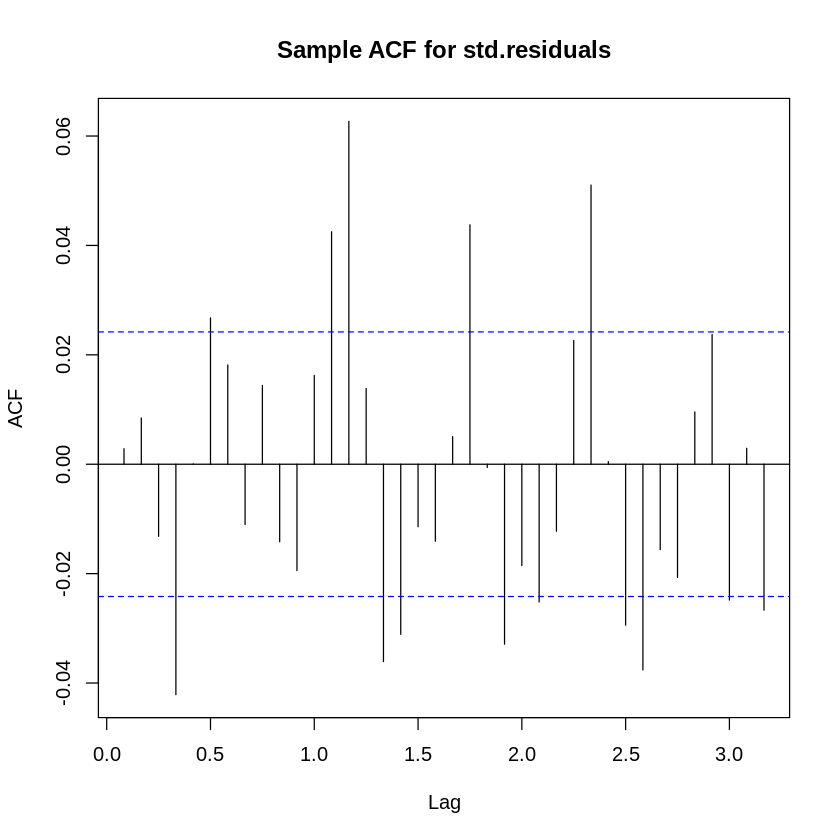

In [ ]:
acf(residuals(arima_model_2_1_2),main="Sample ACF for std.residuals")

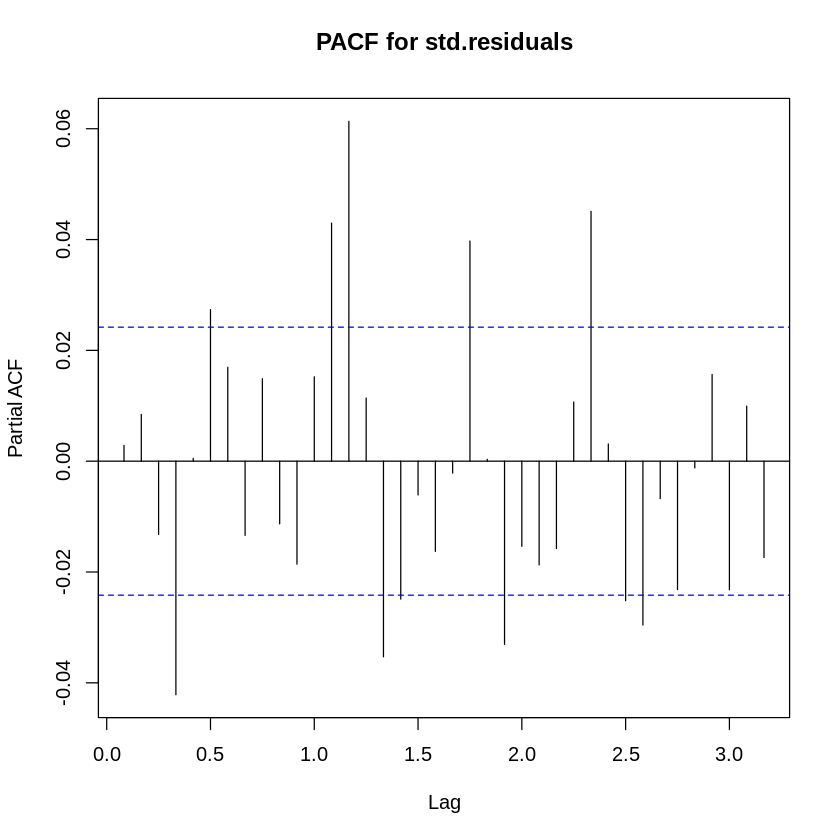

In [ ]:
pacf(residuals(arima_model_2_1_2),main="PACF for std.residuals")

The ACF and PACF does not give clear analysis ,but shows that the residuals are not similar to a white noise

QQ-plot

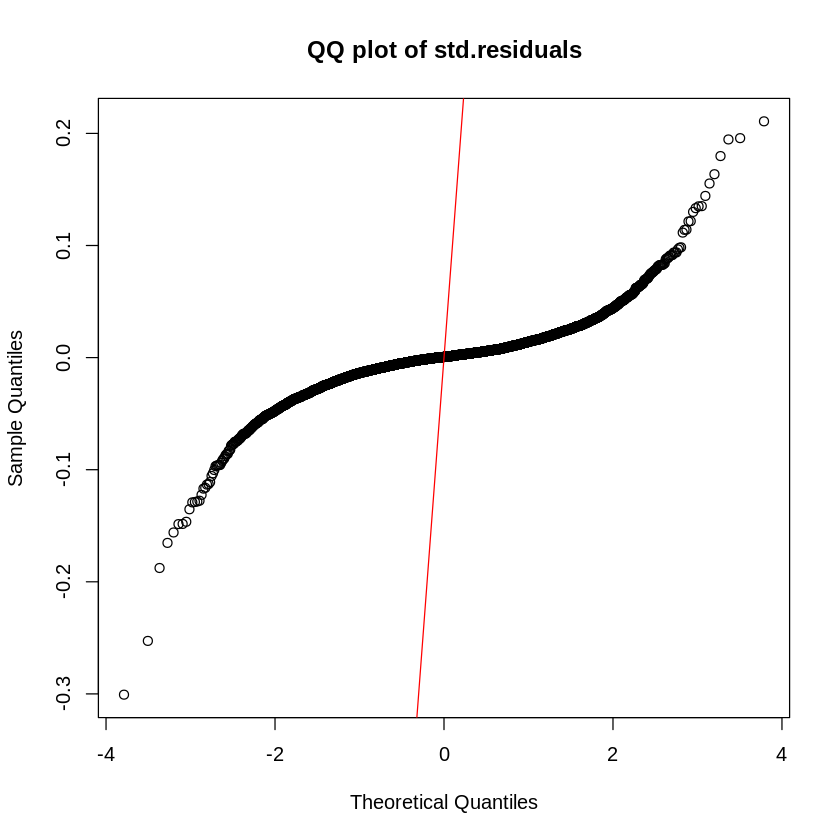

In [ ]:
qqnorm(residuals(arima_model_2_1_2),main="QQ plot of std.residuals")
abline(a = 0, b = 1, col = "red")

The QQplot shows that it does not follow a normal distribution

Stationarity:


In [ ]:
# Perform ADF test for stationarity
adf_result_diff_1 <- adf.test(residuals(arima_model_2_1_2))

print(adf_result_diff_1)

Warning message in adf.test(residuals(arima_model_2_1_2)):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  residuals(arima_model_2_1_2)
Dickey-Fuller = -18.433, Lag order = 18, p-value = 0.01
alternative hypothesis: stationary



The Augmented Dickey-Fuller Test returning the value 0.01 which is less than 0.05 ,Hence the null-hypothesis is rejected. confirming that the residuals are stationary on model (2,1,2)

**Normality test Shapiro_Wilk test**

-**Null Hypothesis:** The residuals of the ARIMA model are normally distributed.

-**Alternate Hypothesis:** The residuals of the ARIMA model are not normally distributed.

In [ ]:
shapiro.test(residuals(arima_model)[0:5000])


	Shapiro-Wilk normality test

data:  residuals(arima_model)[0:5000]
W = 0.8451, p-value < 2.2e-16


A Shapiro-Wilk test with a p-value < 2.2e-16 indicates strong evidence against the null hypothesis of normality. In other words, the null hypothesis, which assumes that the data are normally distributed, is rejected. This suggests that the residuals from the ARIMA model are not normally distributed.

**Independance test RUNS test:**

-Null Hypothesis: The series of residuals is Independant.

-Alternate Hypothesis: The series of residuals is not Independant.

In [ ]:
# # Perform the runs test on the residuals
# library(stats)
# runs_test_result <- runs.test(residuals(arima_model)[0:5000])

# # Print the result of the runs test
# print(runs_test_result)

<ul>
  <li><b>Conclusion after the residuals analysis on model ARIMA(2,1,2):</b></li>
  <ul>
    <li>The mean is constant and centered around zero.</li>
    <li>The variance is constant, indicating homoscedasticity.</li>
    <li>The residuals do not follow a normal distribution, as evidenced by the failed Shapiro-Wilk test.</li>
  </ul>
</ul>
<p>Based on these observations, we can infer that the estimators derived from the ARIMA(2,1,2) model are unbiased. However, the non-normal distribution of residuals suggests that the model does not fully capture all underlying patterns in the data, indicating potential room for improvement.</p>

<h2>Apply Auto arima models</h2>

In [ ]:
library(forecast)
library(astsa)

auto_arima_model <- auto.arima(TS_transformed_data)

summary(auto_arima_model)


Attaching package: ‘astsa’


The following object is masked from ‘package:forecast’:

    gas




Series: TS_transformed_data 
ARIMA(3,1,4)(2,0,0)[12] 

Coefficients:
         ar1      ar2     ar3      ma1     ma2      ma3      ma4    sar1
      0.2355  -0.7349  0.5551  -0.1173  0.6553  -0.4701  -0.1408  0.0236
s.e.  0.1120   0.0425  0.1132   0.1117  0.0515   0.1163   0.0161  0.0128
         sar2
      -0.0362
s.e.   0.0127

sigma^2 = 0.0005003:  log likelihood = 15641.78
AIC=-31263.56   AICc=-31263.52   BIC=-31195.66

Training set error measures:
                        ME       RMSE        MAE         MPE     MAPE      MASE
Training set -2.277987e-05 0.02235059 0.01356547 -0.06385333 1.369516 0.2419582
                     ACF1
Training set 0.0006095555

In [ ]:
forecast_auto_arima <- forecast(auto_arima_model, h = 100)

# Print the forecasted values
print(forecast_auto_arima$mean)

          Jan       Feb       Mar       Apr       May       Jun       Jul
548                                         0.9857618 0.9824349 0.9797265
549 0.9792326 0.9784857 0.9785407 0.9790410 0.9807543 0.9818363 0.9836399
550 0.9845449 0.9834193 0.9832394 0.9832149 0.9829601 0.9832770 0.9837223
551 0.9834141 0.9837046 0.9835473 0.9833085 0.9834607 0.9835589 0.9832507
552 0.9834430 0.9833119 0.9832292 0.9834231 0.9834463 0.9832462 0.9832805
553 0.9832770 0.9832669 0.9834153 0.9833741 0.9832520 0.9833363 0.9834261
554 0.9833201 0.9834100 0.9833399 0.9832785 0.9833659 0.9833933 0.9833019
555 0.9833901 0.9833209 0.9833053 0.9833760 0.9833656 0.9833025 0.9833345
556 0.9833148 0.9833267 0.9833737 0.9833459 0.9833114 0.9833498 0.9833687
          Aug       Sep       Oct       Nov       Dec
548 0.9784308 0.9773384 0.9768873 0.9757410 0.9770298
549 0.9846596 0.9844455 0.9851814 0.9867096 0.9859327
550 0.9835244 0.9833665 0.9837216 0.9838670 0.9834751
551 0.9831763 0.9834309 0.9833552 0.9830874 

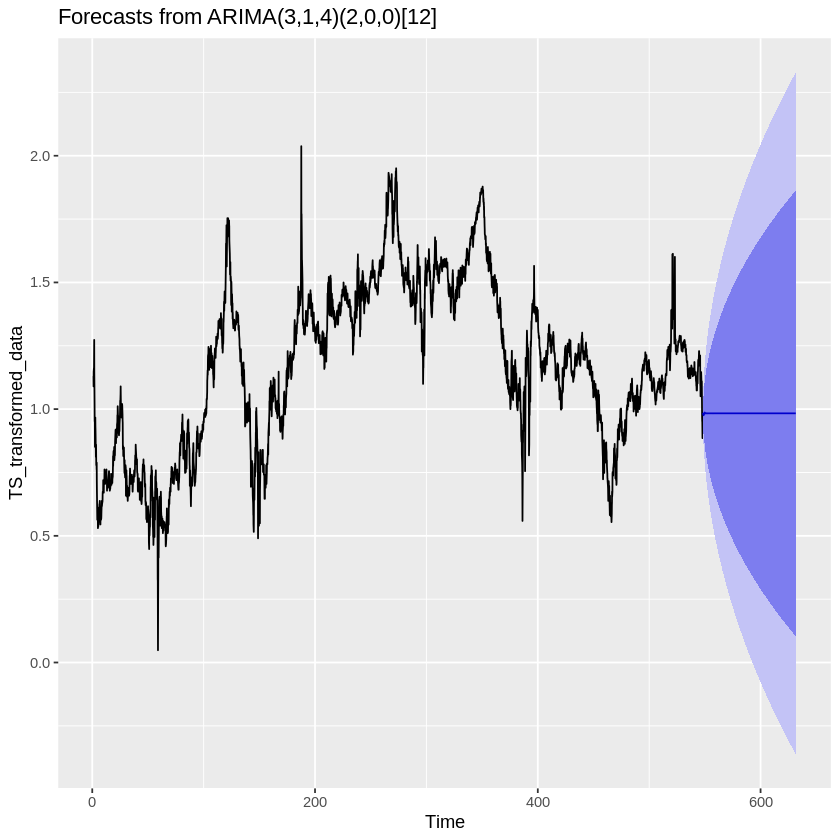

In [ ]:
autoplot(forecast(auto_arima_model,h=1000))

**Results from the auto Arima model:**

After forecasting using the auto.arima model, it is observed that the forecasted values do not align well with the actual data. This suggests that the auto.arima model may not be suitable for accurately predicting the future values of the time series data. Further investigation may be necessary to improve the forecasting performance.

<h1>Forecasting</h1>

Import library

In [ ]:
library(forecast)

In [ ]:
TS_data_test <- ts(data_test, frequency = 12)

<h2>forcasting on ARIMA(2,1,0)</h2>

In [ ]:
forecast_result_arima_model_2_1_0 <- forecast(arima_model_2_1_0, h =length(TS_data_test))

# Print the forecasted values
forecast_result_arima_model_2_1_0$mean

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
548,,,,,0.9872571,0.9871299,0.9871797,0.9871937,0.9871923,0.9871913,0.9871913,0.9871913
549,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913
550,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913
551,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913
552,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913
553,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913
554,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913
555,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913
556,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913
557,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913,0.9871913


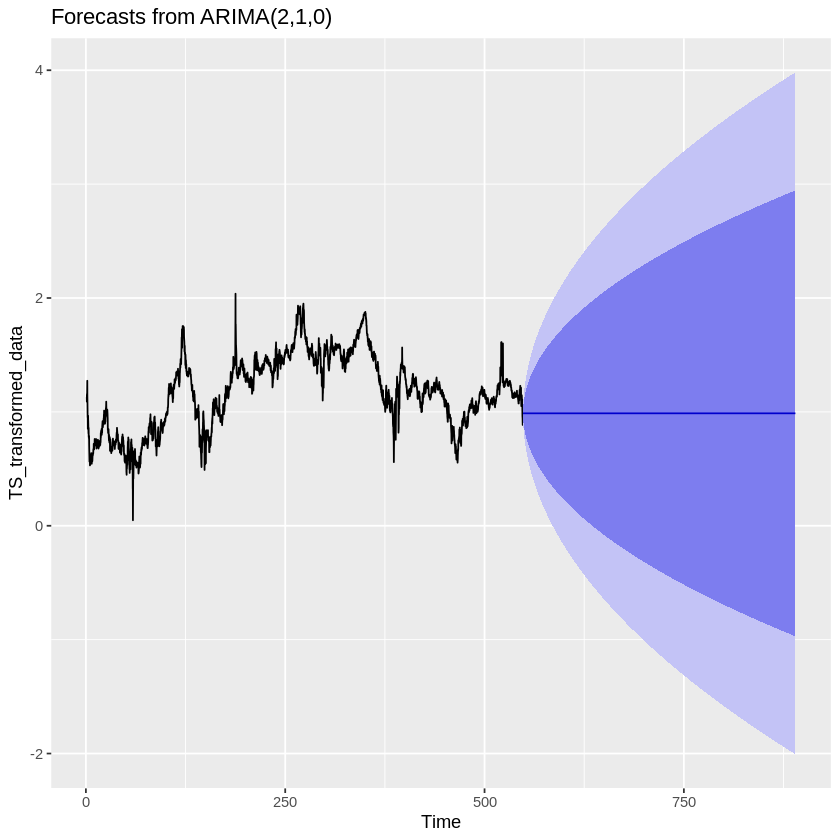

In [ ]:
autoplot(forecast(arima_model_2_1_0,h =length(TS_data_test)))

Results on using ARIMA(2,1,0):
The forecast on long term data test shown bad results ,maybe due to the big horizon chosen

With small horizon:



In [ ]:
forecast_result_arima_model_2_1_0 <- forecast(arima_model_2_1_0, h =7)

# Print the forecasted values
forecast_result_arima_model_2_1_0$mean

,May,Jun,Jul,Aug,Sep,Oct,Nov
548,0.9872571,0.9871299,0.9871797,0.9871937,0.9871923,0.9871913,0.9871913


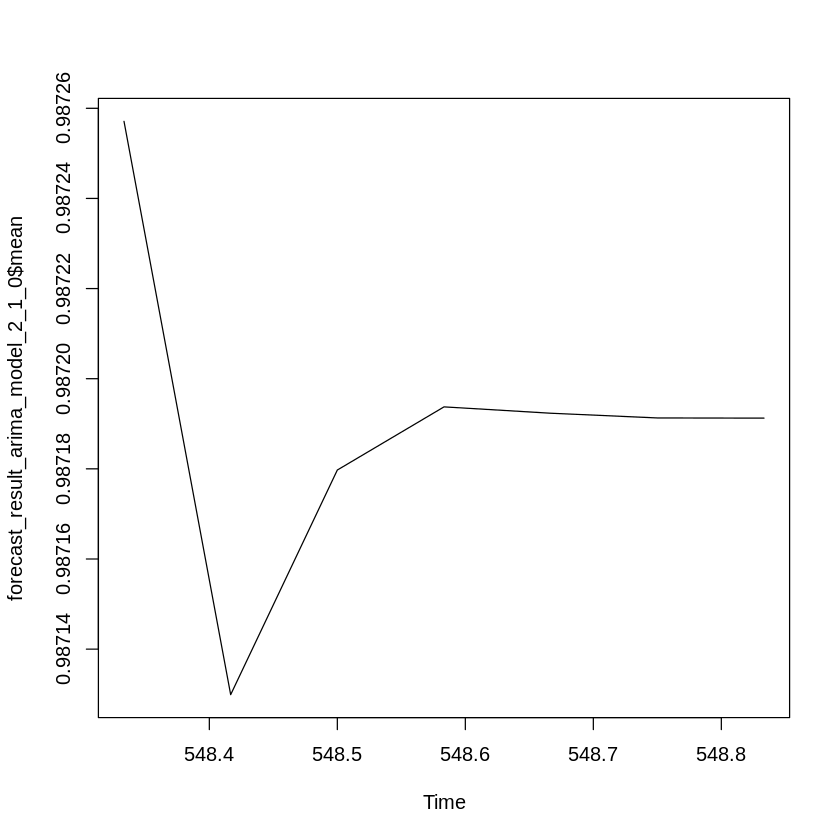

In [ ]:
plot(forecast_result_arima_model_2_1_0$mean)

<h2>forcasting on ARIMA(2,1,1)</h2>

In [ ]:
forecast_result_arima_model_2_1_1 <- forecast(arima_model_2_1_1, h =length(TS_data_test))

# Print the forecasted values
forecast_result_arima_model_2_1_1$mean

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
548,,,,,0.9883136,0.9883079,0.9883111,0.9883093,0.9883104,0.9883098,0.9883101,0.9883099
549,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100
550,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100
551,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100
552,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100
553,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100
554,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100
555,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100
556,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100
557,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100,0.9883100


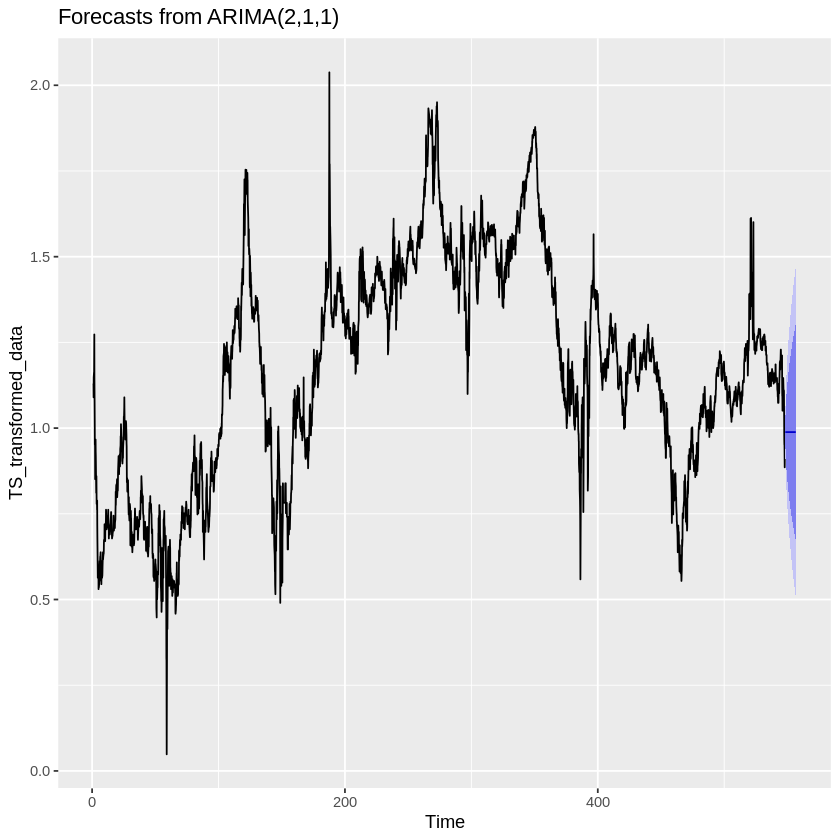

In [ ]:
autoplot(forecast(arima_model_2_1_1,h =100))

Results on using ARIMA(2,1,1):does not forecast well on the data test

<h2>forcasting on ARIMA(2,1,2)</h2>

In [ ]:
# Forecast using the ARIMA model
forecast_result <- forecast(arima_model_2_1_2, h = 100)
subset_data_test <- data_test[1:100, ]
actual_values <- subset_data_test$Price

forecasted_values <- forecast_result$mean

# Print actual vs forecasted values
cbind(Actual = actual_values, Forecasted = forecasted_values)


,Actual,Forecasted
May 548,3.075000,0.9851177
Jun 548,3.010000,0.9826565
Jul 548,3.080000,0.9801306
Aug 548,3.150000,0.9785723
Sep 548,3.220000,0.9793539
Oct 548,2.980000,0.9806107
Nov 548,3.080000,0.9814236
Dec 548,2.920000,0.9834045
Jan 549,2.960000,0.9859405
Feb 549,2.940000,0.9871792


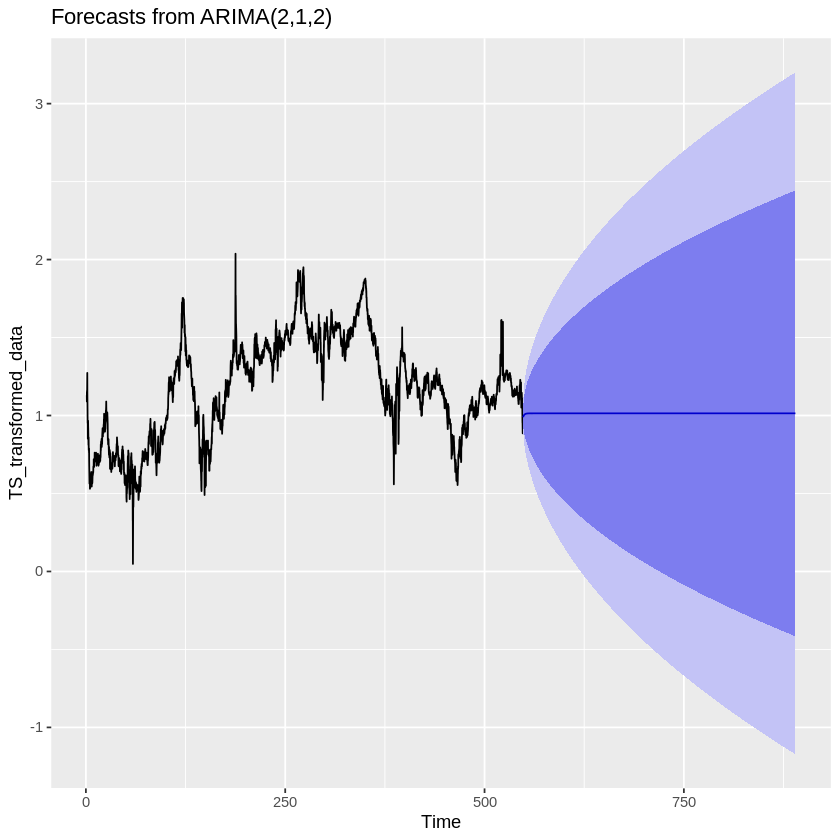

In [ ]:
autoplot(forecast(arima_model,h =length(TS_data_test)))

Results on using ARIMA(2,1,2):
We notice that the forecast is not performing well on test data ,which is a sign that the ARIMA(2,1,2) is not a good fit

<h2>General Result:</h2>

After extensive experimentation with various ARIMA models to forecast natural gas prices, it becomes evident that while some models fit the data well and capture its underlying patterns, they often exhibit poor performance in the long term. Despite accurately reflecting historical trends and fluctuations, these models struggle to provide accurate forecasts over extended periods. This discrepancy highlights the inherent challenges and limitations of ARIMA models when forecasting natural gas prices, particularly when projecting into the future.

<h1>Discussion</h1>

**Summary :**

In this project, we explored the time series forecasting techniques to predict natural gas prices accurately. By leveraging historical data and advanced modeling approaches, we aimed to develop robust forecasting models that can provide valuable insights and support decision-making processes in the natural gas market.

Key Conclusions:


*   Through the analysis, we identified trends and patterns in the natural gas price data.
*   We applied preprocessing techniques such as Box-Cox transformation to stabilize the variance and achieve stationarity in the data.
*   the modeling efforts focused on the ARIMA family of models, which did not show good results on forcasting at least on this data
*   The ARIMA models may work on other data , living open discussion on how good is the data and which way to choose the best model ,so far i could conclude that arima models are not the best fit for this data ,yet further discussion can be done concerning this problem



    
    
    
    

<h1>Future work</h1>

Future work could involve exploring alternative forecasting models such as Prophet and recurrent neural networks (RNN), particularly long short-term memory (LSTM) networks, to compare their performance with the ARIMA models. This comparative analysis would provide insights into the strengths and weaknesses of different forecasting techniques and help determine which model is best suited for forecasting natural gas prices. Additionally, experimenting with different hyperparameters and model architectures in RNNs could further improve forecasting accuracy.

Additionally,investigate the impact of external factors such as economic indicators, weather patterns, and geopolitical events on natural gas prices to enhance the predictive accuracy of our models.

<h1>Appendix</h1>

The data has some missing dates in between in the original one ,hence i filled the missing dates and the script is the following

In [ ]:
data <- read.csv("Natural Gas Price Forecasting.xls")
head(data)
# Convert the 'dt' column to Date format
data$Date <- as.Date(data$Date)
library(zoo)

# Function to fill missing dates and values
fill_missing_dates <- function(df) {
  z <- zoo(df[-1], order.by = df$Date)

  # Create a sequence of dates from min to max
  idx <- seq(min(df$Date), max(df$Date), by = "day")

  # Reindex with missing dates and fill missing values with NA
  z <- merge(z, zoo(, idx))

  # Fill missing values using linear interpolation
  z_filled <- na.approx(z)

  # Convert zoo object back to a data frame
  filled_df <- data.frame(Date = time(z_filled), coredata(z_filled))
  return(filled_df)
}

filled_df <- fill_missing_dates(data)
print(filled_df)
#return CSV after filling
write.csv(filled_df, "data.csv", row.names = FALSE)